## Data Analytics with R
## Final Group Project: Predict Future Sales
### Project Team : ```Gagan Indukala Krishna Murthy```, ```Aanwi Anil Tarihalkar``` and ```Shataksh```

_________________________________________
_________________________________________


### We are using R Programing Language for this project
### Data reading, visualization and cleaning 

In [3]:
#Libraries 
library(readr)#Write csv
library(dplyr) # Handle data and use of pipes
library(tidyr) # Handle dataframes
library(ggplot2) # Useful library to visualizations
library(lubridate) # Handle with dates
library(randomForest) # Random Forest
# install.packages("Metrics")
library(Metrics) # Use of RMSE metric
# install.packages("ggcorrplot")
library(ggcorrplot) # Correlation plot
library(caret) # ML library
library(scales) # To rescale output values
# install.packages("RANN")
library(RANN)

In [2]:
# Read CSV files
sales_train <- read.csv("sales_train.csv")
test <- read.csv("test.csv")
items <- read.csv("items.csv")
item_categories <- read.csv("item_categories.csv")
shops <- read.csv("shops.csv")

# Display the first few rows of each data frame
print("sales_train:")
head(sales_train)
print("test:")
head(test)
print("items:")
head(items)
print("item_categories:")
head(item_categories)
print("shops:")
head(shops)


[1] "sales_train:"


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
,<chr>,<int>,<int>,<int>,<dbl>,<dbl>
1,02.01.2013,0,59,22154,999.00,1
2,03.01.2013,0,25,2552,899.00,1
3,05.01.2013,0,25,2552,899.00,-1
4,06.01.2013,0,25,2554,1709.05,1
5,15.01.2013,0,25,2555,1099.00,1
6,10.01.2013,0,25,2564,349.00,1


[1] "test:"


,ID,shop_id,item_id
,<int>,<int>,<int>
1,0,5,5037
2,1,5,5320
3,2,5,5233
4,3,5,5232
5,4,5,5268
6,5,5,5039


[1] "items:"


,item_name,item_id,item_category_id
,<chr>,<int>,<int>
1,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
2,"!ABBYY FineReader 12 Professional Edition Full [PC, Цифровая версия]",1,76
3,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
4,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
5,***КОРОБКА (СТЕКЛО) D,4,40
6,***НОВЫЕ АМЕРИКАНСКИЕ ГРАФФИТИ (UNI) D,5,40


[1] "item_categories:"


,item_category_name,item_category_id
,<chr>,<int>
1,PC - Гарнитуры/Наушники,0
2,Аксессуары - PS2,1
3,Аксессуары - PS3,2
4,Аксессуары - PS4,3
5,Аксессуары - PSP,4
6,Аксессуары - PSVita,5


[1] "shops:"


,shop_name,shop_id
,<chr>,<int>
1,"!Якутск Орджоникидзе, 56 фран",0
2,"!Якутск ТЦ ""Центральный"" фран",1
3,"Адыгея ТЦ ""Мега""",2
4,"Балашиха ТРК ""Октябрь-Киномир""",3
5,"Волжский ТЦ ""Волга Молл""",4
6,"Вологда ТРЦ ""Мармелад""",5


In [3]:
# Check for null values in each data frame
print("Null values in sales_train:")
sum(is.na(sales_train))
print("Null values in test:")
sum(is.na(test))
print("Null values in items:")
sum(is.na(items))
print("Null values in item_categories:")
sum(is.na(item_categories))
print("Null values in shops:")
sum(is.na(shops))

[1] "Null values in sales_train:"


[1] 0

[1] "Null values in test:"


[1] 0

[1] "Null values in items:"


[1] 0

[1] "Null values in item_categories:"


[1] 0

[1] "Null values in shops:"


[1] 0

In [4]:
# Shapes of data frames
print("Shape of sales_train:")
print(dim(sales_train))
print("Shape of test:")
print(dim(test))
print("Shape of items:")
print(dim(items))
print("Shape of item_categories:")
print(dim(item_categories))
print("Shape of shops:")
print(dim(shops))

[1] "Shape of sales_train:"
[1] 2935849       6
[1] "Shape of test:"
[1] 214200      3
[1] "Shape of items:"
[1] 22170     3
[1] "Shape of item_categories:"
[1] 84  2
[1] "Shape of shops:"
[1] 60  2


In [5]:
# Information of data frames
print("Info of sales_train:")
str(sales_train)
print("Info of test:")
str(test)
print("Info of items:")
str(items)
print("Info of item_categories:")
str(item_categories)
print("Info of shops:")
str(shops)

[1] "Info of sales_train:"
'data.frame':	2935849 obs. of  6 variables:
 $ date          : chr  "02.01.2013" "03.01.2013" "05.01.2013" "06.01.2013" ...
 $ date_block_num: int  0 0 0 0 0 0 0 0 0 0 ...
 $ shop_id       : int  59 25 25 25 25 25 25 25 25 25 ...
 $ item_id       : int  22154 2552 2552 2554 2555 2564 2565 2572 2572 2573 ...
 $ item_price    : num  999 899 899 1709 1099 ...
 $ item_cnt_day  : num  1 1 -1 1 1 1 1 1 1 3 ...
[1] "Info of test:"
'data.frame':	214200 obs. of  3 variables:
 $ ID     : int  0 1 2 3 4 5 6 7 8 9 ...
 $ shop_id: int  5 5 5 5 5 5 5 5 5 5 ...
 $ item_id: int  5037 5320 5233 5232 5268 5039 5041 5046 5319 5003 ...
[1] "Info of items:"
'data.frame':	22170 obs. of  3 variables:
 $ item_name       : chr  "! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.)         D" "!ABBYY FineReader 12 Professional Edition Full [PC, Цифровая версия]" "***В ЛУЧАХ СЛАВЫ   (UNV)                    D" "***ГОЛУБАЯ ВОЛНА  (Univ)                      D" ...
 $ item_id         : int  0 1 2 3 4 5 6 7 8

In [6]:
# Summary of the data frames
print("Info of sales_train:")
summary(sales_train)
print("Info of test:")
summary(test)
print("Info of items:")
summary(items)
print("Info of item_categories:")
summary(item_categories)
print("Info of shops:")
summary(shops)

[1] "Info of sales_train:"


     date           date_block_num     shop_id      item_id     
 Length:2935849     Min.   : 0.00   Min.   : 0   Min.   :    0  
 Class :character   1st Qu.: 7.00   1st Qu.:22   1st Qu.: 4476  
 Mode  :character   Median :14.00   Median :31   Median : 9343  
                    Mean   :14.57   Mean   :33   Mean   :10197  
                    3rd Qu.:23.00   3rd Qu.:47   3rd Qu.:15684  
                    Max.   :33.00   Max.   :59   Max.   :22169  
   item_price        item_cnt_day     
 Min.   :    -1.0   Min.   : -22.000  
 1st Qu.:   249.0   1st Qu.:   1.000  
 Median :   399.0   Median :   1.000  
 Mean   :   890.9   Mean   :   1.243  
 3rd Qu.:   999.0   3rd Qu.:   1.000  
 Max.   :307980.0   Max.   :2169.000  

[1] "Info of test:"


       ID            shop_id         item_id     
 Min.   :     0   Min.   : 2.00   Min.   :   30  
 1st Qu.: 53550   1st Qu.:16.00   1st Qu.: 5382  
 Median :107100   Median :34.50   Median :11203  
 Mean   :107100   Mean   :31.64   Mean   :11019  
 3rd Qu.:160649   3rd Qu.:47.00   3rd Qu.:16072  
 Max.   :214199   Max.   :59.00   Max.   :22167  

[1] "Info of items:"


  item_name            item_id      item_category_id
 Length:22170       Min.   :    0   Min.   : 0.00   
 Class :character   1st Qu.: 5542   1st Qu.:37.00   
 Mode  :character   Median :11084   Median :40.00   
                    Mean   :11084   Mean   :46.29   
                    3rd Qu.:16627   3rd Qu.:58.00   
                    Max.   :22169   Max.   :83.00   

[1] "Info of item_categories:"


 item_category_name item_category_id
 Length:84          Min.   : 0.00   
 Class :character   1st Qu.:20.75   
 Mode  :character   Median :41.50   
                    Mean   :41.50   
                    3rd Qu.:62.25   
                    Max.   :83.00   

[1] "Info of shops:"


  shop_name            shop_id     
 Length:60          Min.   : 0.00  
 Class :character   1st Qu.:14.75  
 Mode  :character   Median :29.50  
                    Mean   :29.50  
                    3rd Qu.:44.25  
                    Max.   :59.00  

#### Data calculation

In [7]:
# Extract unique shop IDs and calculate the total number of shops
sales_train %>%
  select(shop_id) %>%
  distinct() %>%
  summarise("No of Shops" = n())

No of Shops
<int>
60


In [8]:
# Extract unique item IDs and calculate the total number of items
sales_train %>%
  select(item_id) %>%
  distinct() %>%
  summarise("No of Items" = n())


No of Items
<int>
21807


#### Data Representation

In [9]:
# Calculate total sales count for each shop
popular_shops <- sales_train %>%
  group_by(shop_id) %>%
  summarize(ICcount = sum(item_cnt_day)) %>%
  ungroup() %>%
  arrange(desc(ICcount))

# Display the top 8 highest selling shops
top_8_shops <- head(popular_shops, 8)
head(top_8_shops)

# Set options to display large numbers in standard format
options(scipen = 999)

shop_id,ICcount
<int>,<dbl>
31,310777
25,241920
54,185790
28,184557
42,144934
57,141107


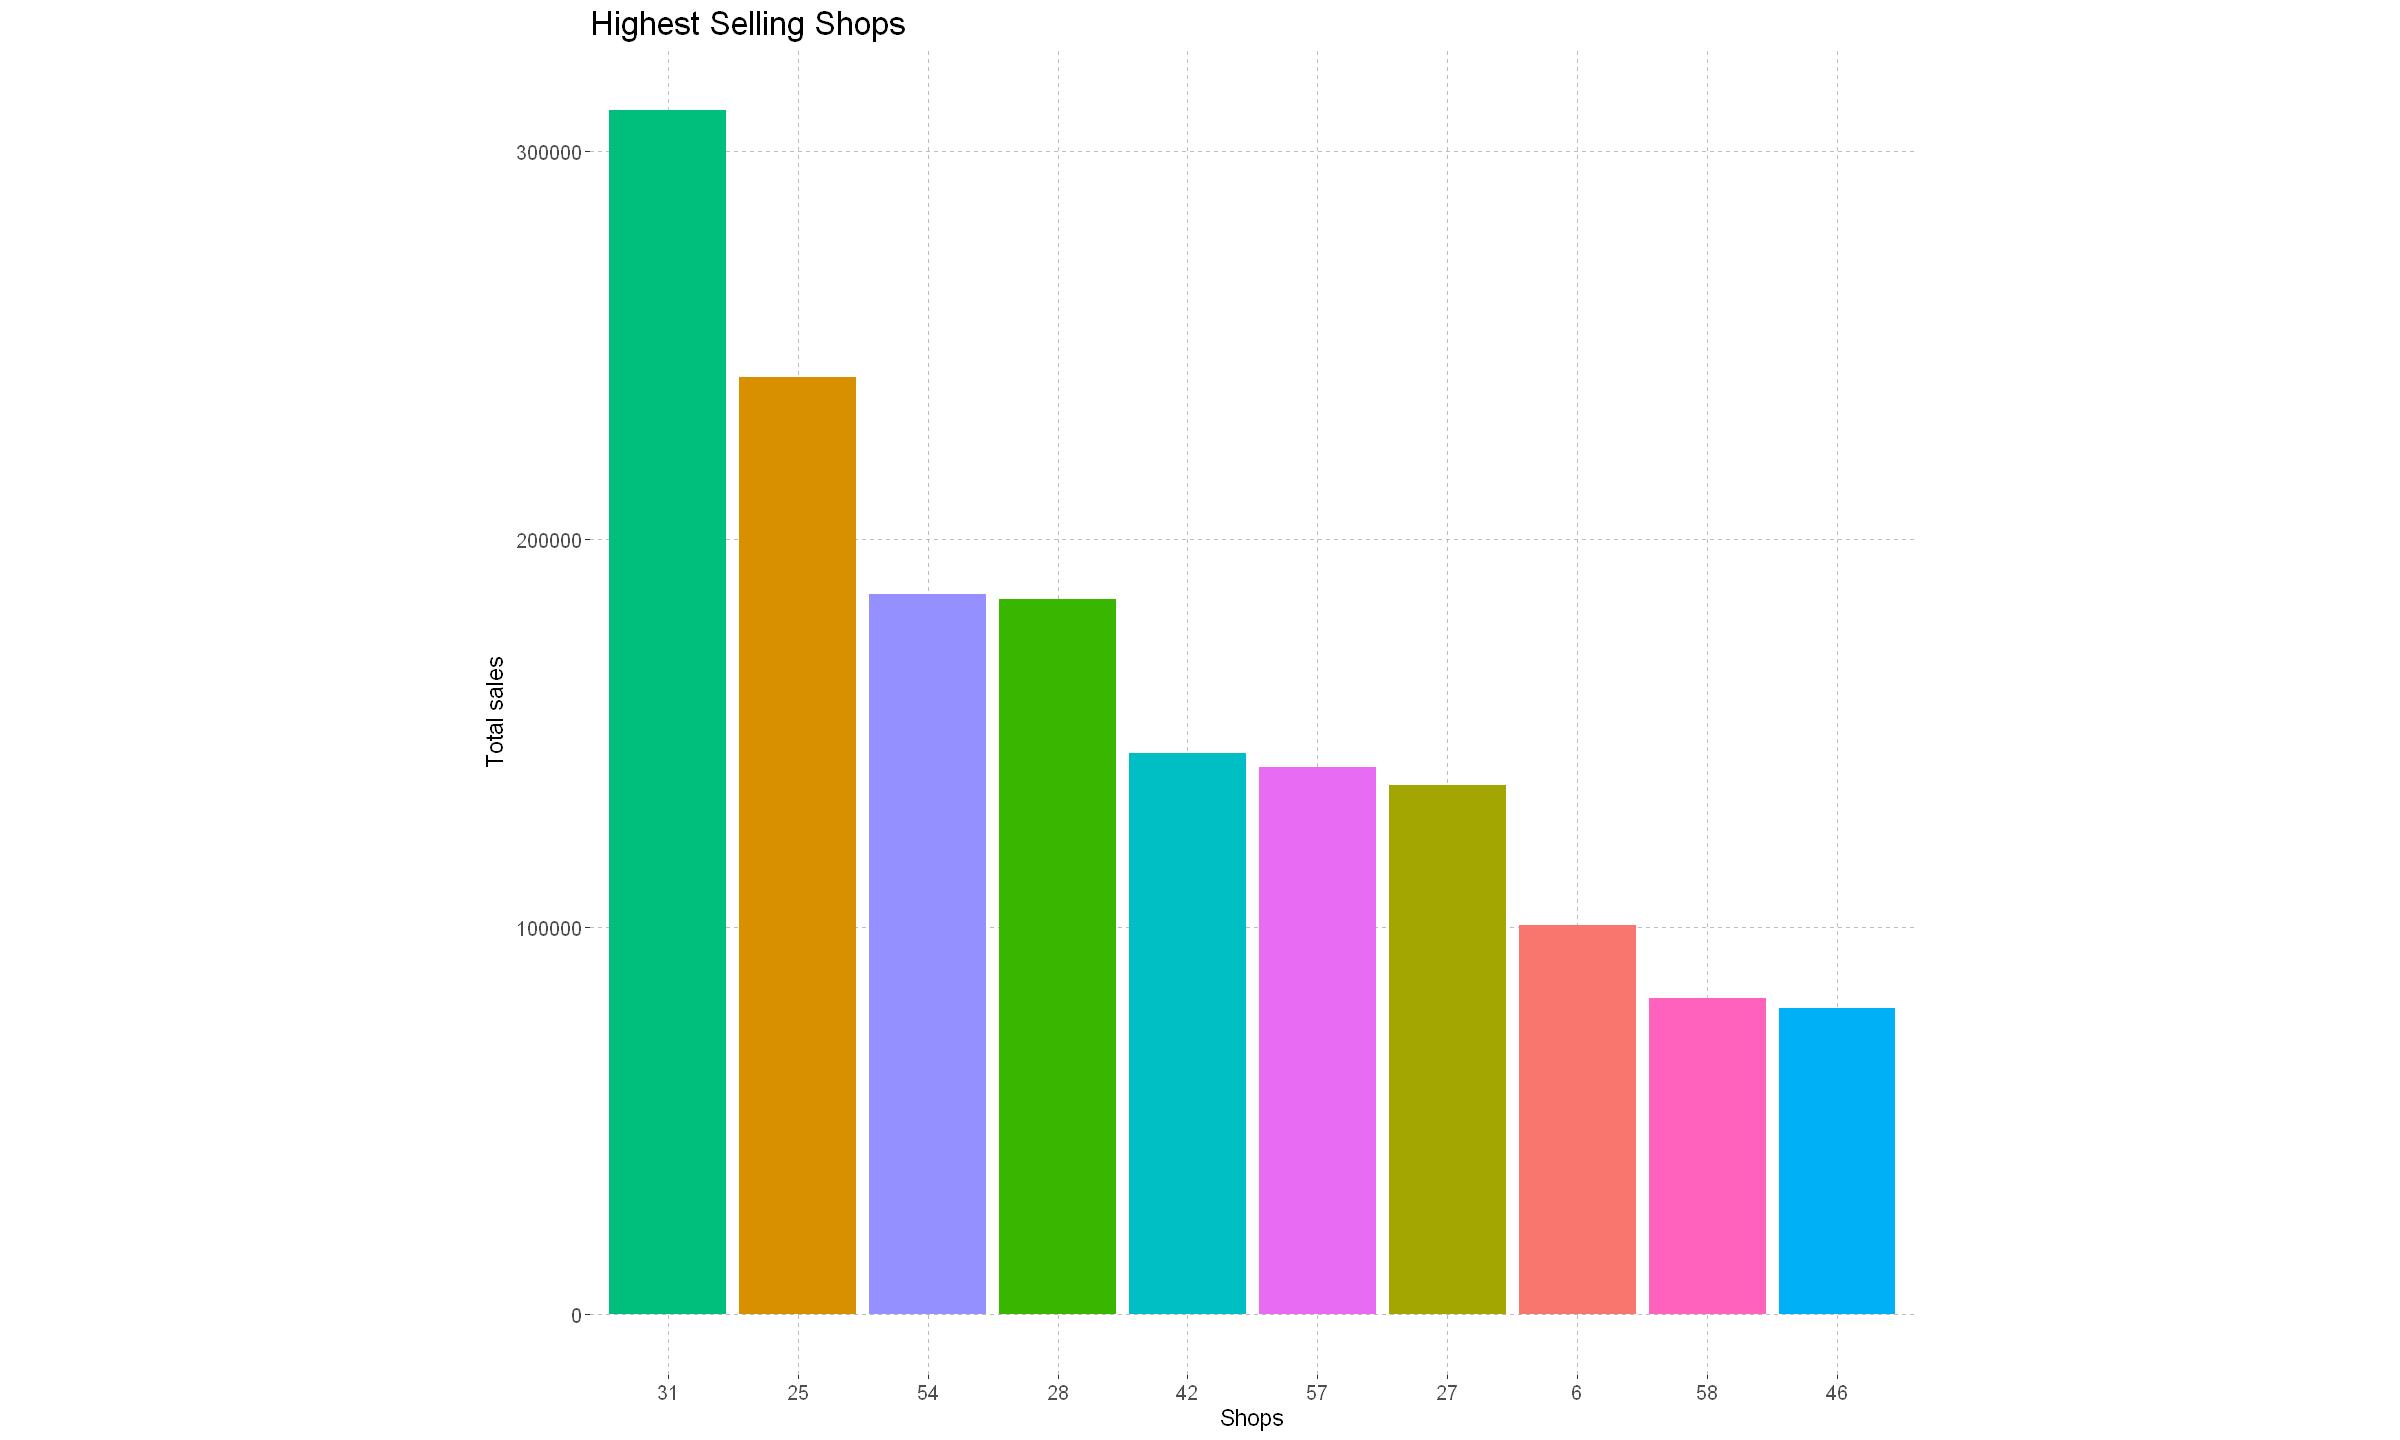

In [10]:
# Set the width and height of the plot to be displayed in the output
options(repr.plot.width = 20, repr.plot.height = 12)

# Plot a larger bar chart showing the total sales for the top 10 highest selling shops in ascending order
top_10_shops <- head(popular_shops, 10)
top_10_shops %>%
  ggplot(aes(x = reorder(as.factor(shop_id), ICcount, FUN = function(x) -x), y = ICcount, fill = as.factor(shop_id))) +
  geom_bar(stat = 'identity') + 
  theme(legend.position = "none") +
  labs(y = 'Total sales', x = 'Shops', title = 'Highest Selling Shops') +
  theme(
    plot.title = element_text(size = 20),  # Title size
    axis.title.x = element_text(size = 14),  # X-axis label size
    axis.title.y = element_text(size = 14),  # Y-axis label size
    axis.text.x = element_text(size = 12),  # X-axis tick label size
    axis.text.y = element_text(size = 12)   # Y-axis tick label size
  ) +
  theme(
    plot.background = element_rect(fill = "white"),  # Background color
    panel.background = element_rect(fill = "white"),  # Panel background color
    panel.grid.major = element_line(color = "gray", linetype = "dashed"),  # Major grid line color and type
    panel.grid.minor = element_blank()  # Minor grid lines
  ) +
  theme(
    aspect.ratio = 1  # Aspect ratio (adjust as needed)
  )


In [11]:
# Calculate total sales count for each item
best_item <- sales_train %>%
  group_by(item_id) %>%
  summarize(Icount = sum(item_cnt_day)) %>%
  ungroup() %>%
  arrange(desc(Icount))

# Display the top 8 highest selling items
top_8_items <- head(best_item, 8)
head(top_8_items)

item_id,Icount
<int>,<dbl>
20949,187642
2808,17245
3732,16642
17717,15830
5822,14515
3734,11688


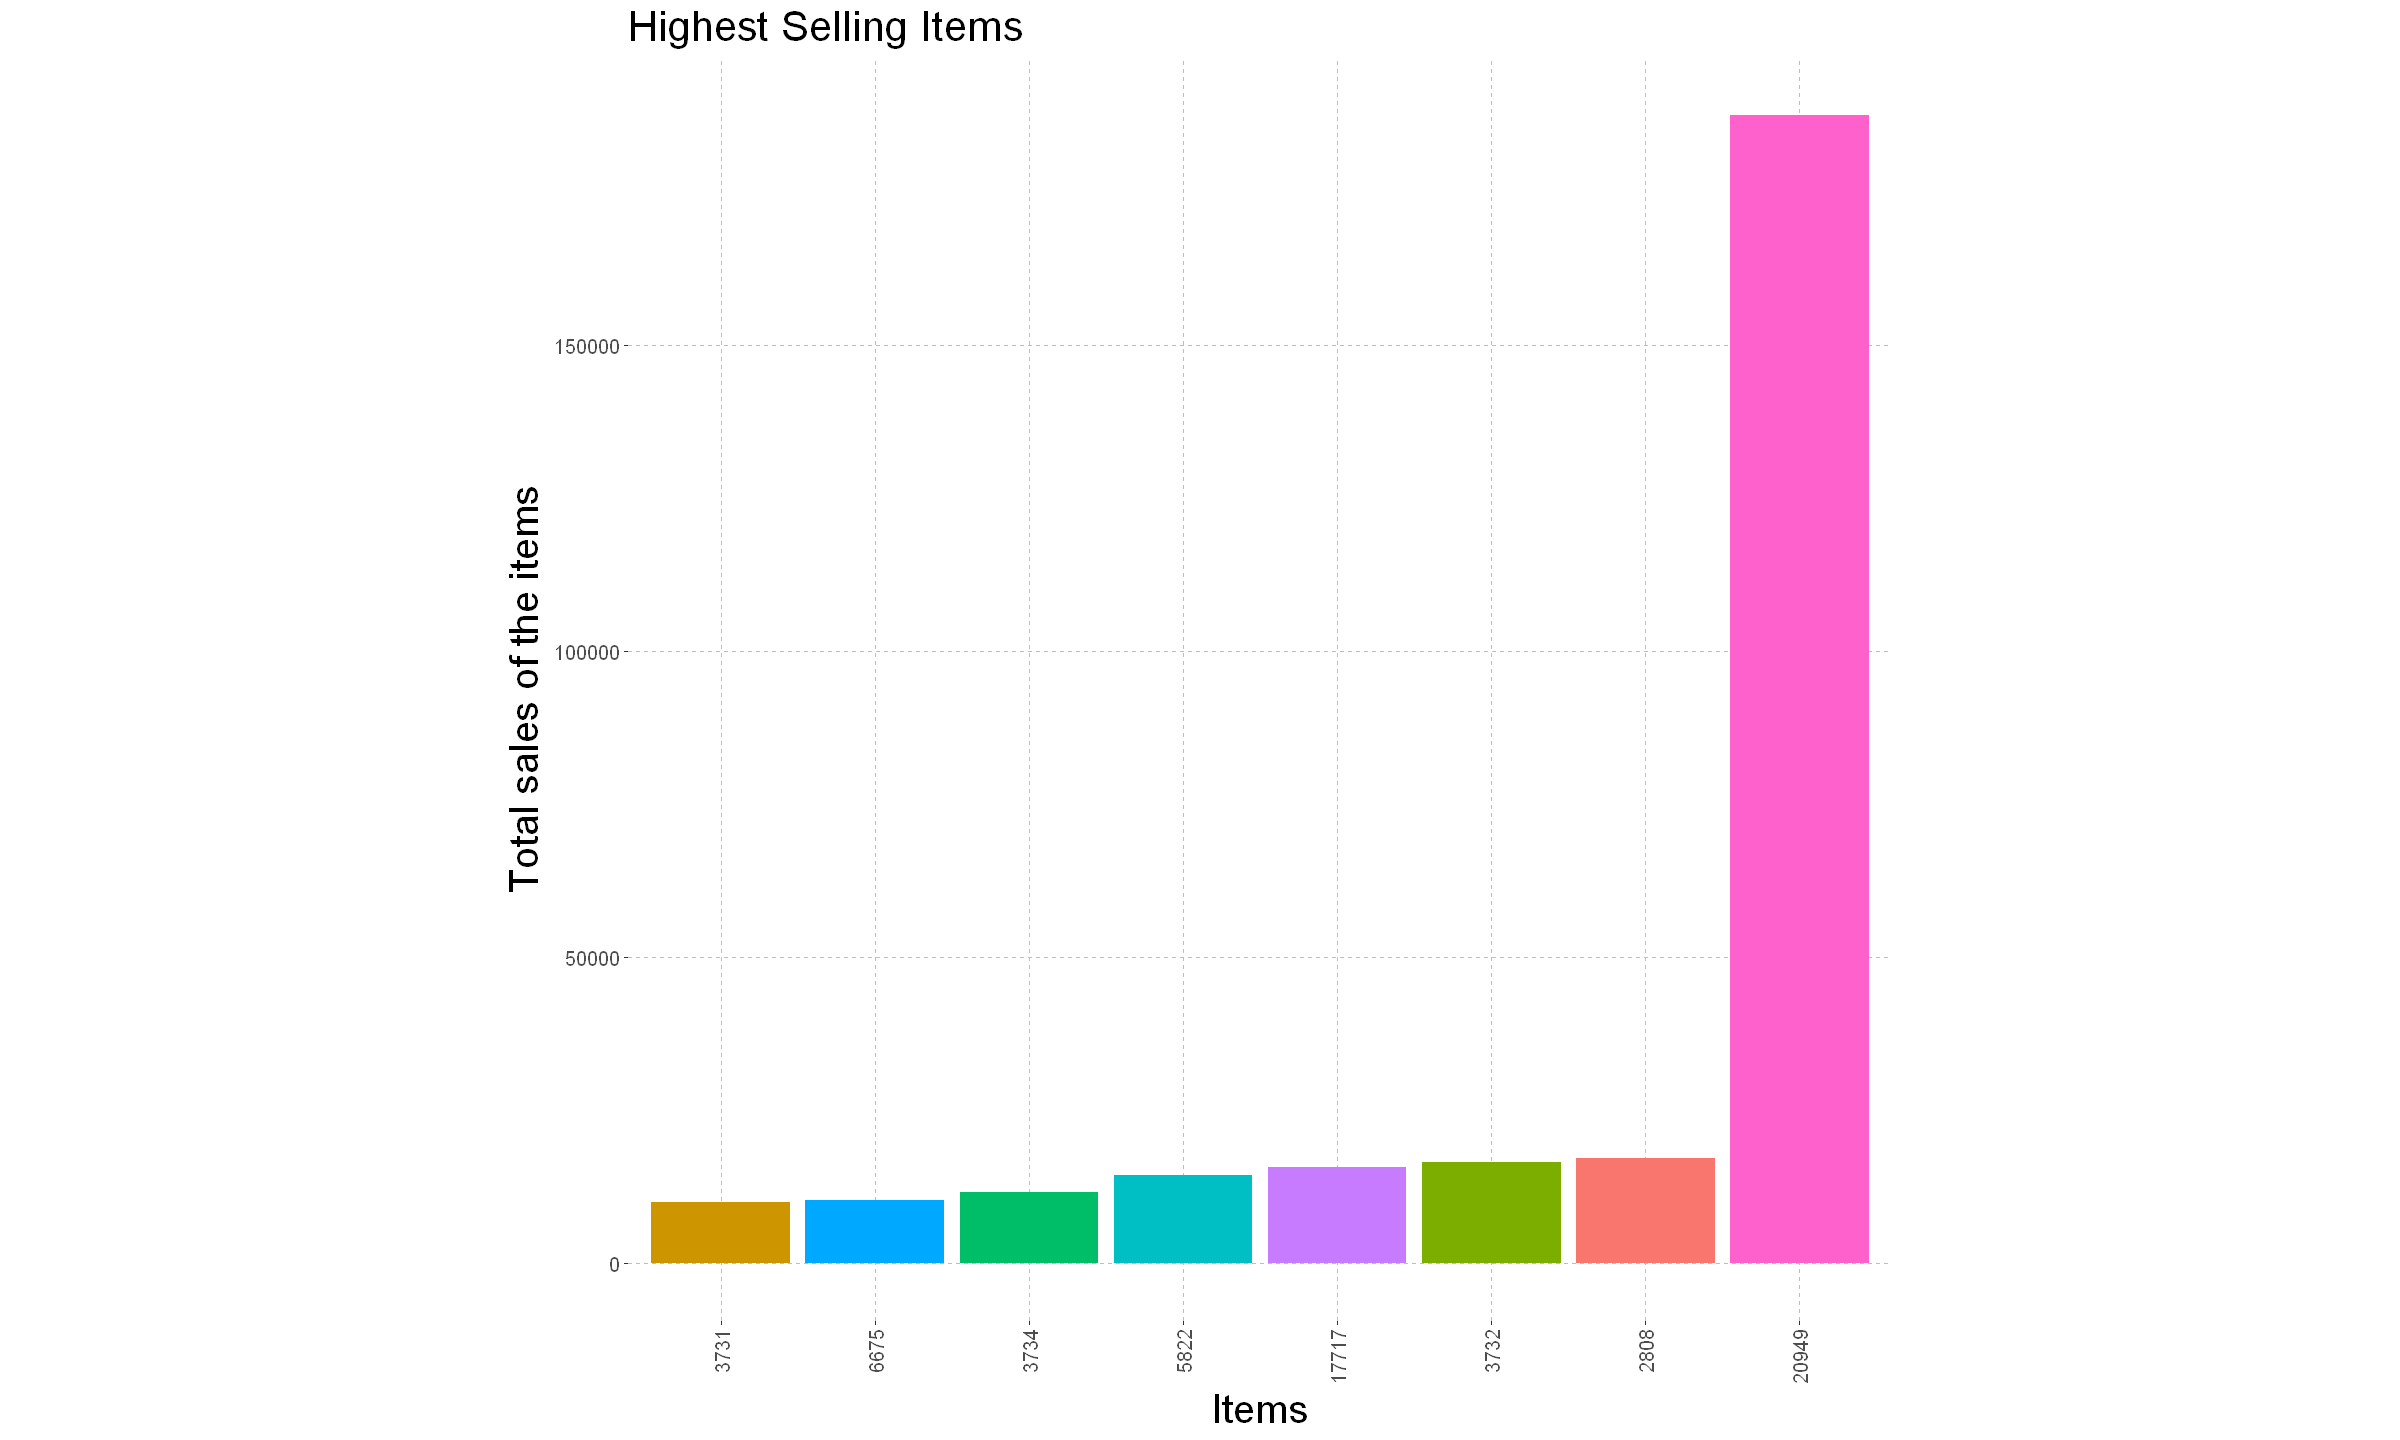

In [12]:
# Set the width and height of the plot to be displayed in the output
options(repr.plot.width = 20, repr.plot.height = 12)
# Plot a larger bar chart showing the total sales for the top 10 highest selling items in ascending order
top_8_items %>%
  ggplot(aes(x = reorder(as.factor(item_id), Icount), y = Icount, fill = as.factor(item_id))) +
  geom_bar(stat = 'identity') + 
  theme(legend.position = "none") +
  labs(y = 'Total sales of the items', x = 'Items', title = 'Highest Selling Items') +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1),  # Rotate x-axis labels for better readability
        plot.title = element_text(size = 25),  # Title size
        axis.title.x = element_text(size = 24),  # X-axis label size
        axis.title.y = element_text(size = 24),  # Y-axis label size
        axis.text = element_text(size = 12),    # Axis tick label size
        panel.grid.major = element_line(color = "gray", linetype = "dashed"),  # Major grid line color and type
        panel.grid.minor = element_blank(),  # Minor grid lines
        plot.background = element_rect(fill = "white"),  # Background color
        panel.background = element_rect(fill = "white")) +  # Panel background color
  theme(aspect.ratio = 1)  # Adjust aspect ratio as needed


In [13]:
# Calculate the most selling item per shop
items_per_shop <- sales_train %>%
  group_by(shop_id, item_id) %>%
  summarise(QTY = sum(item_cnt_day)) %>%
  filter(QTY == max(QTY)) %>%
  arrange(desc(QTY)) %>%
  ungroup()

# Display the top records of the most selling item per shop
top_records <- head(items_per_shop)
top_records

`summarise()` has grouped output by 'shop_id'. You can override using the `.groups` argument.


shop_id,item_id,QTY
<int>,<int>,<dbl>
31,20949,19934
25,20949,14343
28,20949,13458
54,20949,12323
42,20949,10514
27,20949,8265


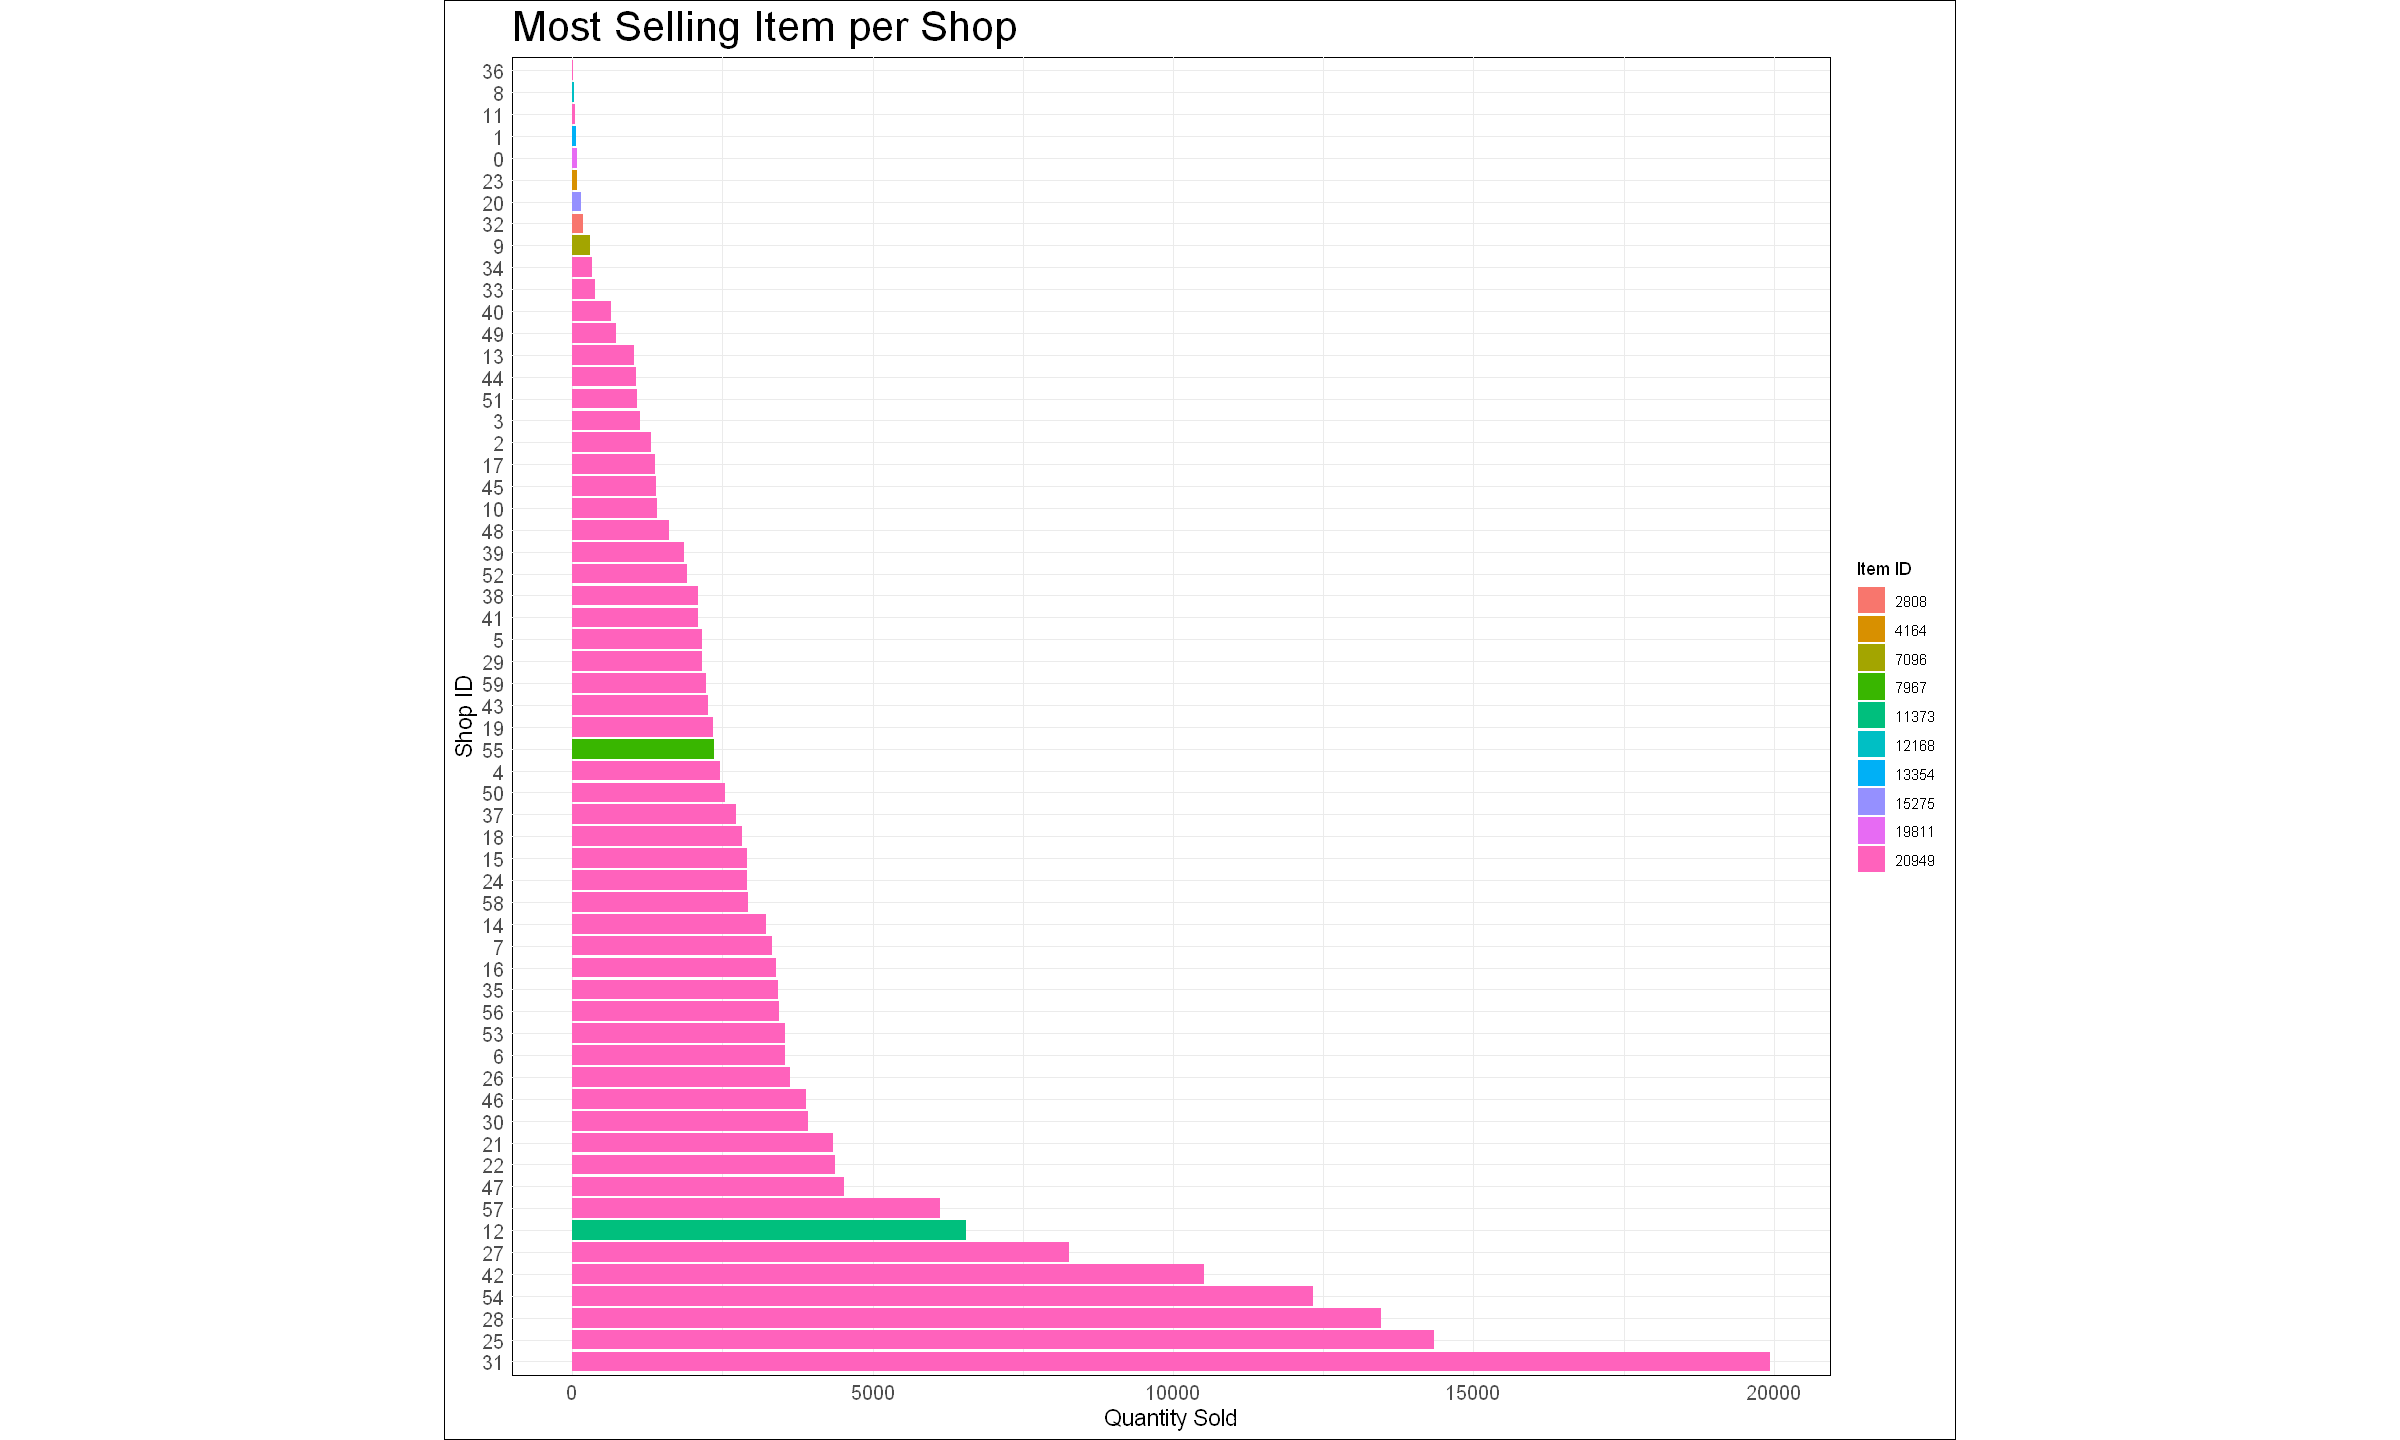

In [14]:
# Set the width and height of the plot to be displayed in the output
options(repr.plot.width = 20, repr.plot.height = 12)

# Plot a bar chart showing the most selling item per shop, with the x-axis in ascending order
ggplot(data = items_per_shop, aes(x = reorder(as.factor(shop_id), -QTY), y = QTY, fill = as.factor(item_id))) + 
  geom_bar(stat = "identity") + 
  coord_flip() +  # Flip coordinates to make it vertical
  labs(title = "Most Selling Item per Shop", x = "Shop ID", y = "Quantity Sold", fill = "Item ID") +  # Set title and axis labels
  theme_minimal() +  # Set a minimal theme for clearer view
  theme(
    plot.title = element_text(size = 25),  # Title size
    axis.title.x = element_text(size = 14),  # X-axis label size
    axis.title.y = element_text(size = 14),  # Y-axis label size
    axis.text.x = element_text(size = 12),  # X-axis tick label size
    axis.text.y = element_text(size = 12)   # Y-axis tick label size
  ) +  # Set text sizes
  theme(
    plot.background = element_rect(fill = "white"),  # Background color
    panel.background = element_rect(fill = "white")  # Panel background color
  ) +  # Set background colors
  theme(
    aspect.ratio = 1  # Aspect ratio (adjust as needed)
  )  # Set aspect ratio


In [15]:
# Merge sales data with items data
sales <- left_join(sales_train, items, by = "item_id") 

# Merge with item categories data
sales <- left_join(sales, item_categories, by = "item_category_id") 

# Merge with shops data
sales <- left_join(sales, shops, by = "shop_id")  

# Convert the date column to Date format
sales$date <- as.Date(sales$date, format = "%d.%m.%Y")

# Display the first few rows of the merged sales data
head(sales)


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name,shop_name
,<date>,<int>,<int>,<int>,<dbl>,<dbl>,<chr>,<int>,<chr>,<chr>
1,2013-01-02,0,59,22154,999.00,1,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""
2,2013-01-03,0,25,2552,899.00,1,DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил,"Москва ТРК ""Атриум"""
3,2013-01-05,0,25,2552,899.00,-1,DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил,"Москва ТРК ""Атриум"""
4,2013-01-06,0,25,2554,1709.05,1,DEEP PURPLE Who Do You Think We Are LP,58,Музыка - Винил,"Москва ТРК ""Атриум"""
5,2013-01-15,0,25,2555,1099.00,1,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,Музыка - CD фирменного производства,"Москва ТРК ""Атриум"""
6,2013-01-10,0,25,2564,349.00,1,DEEP PURPLE Perihelion: Live In Concert DVD (Кир.),59,Музыка - Музыкальное видео,"Москва ТРК ""Атриум"""


In [16]:
# Extract month, day, quarter, day of the week, and year from the date column
# Extract date components using mutate
sales <- sales %>%
  mutate(
    month = lubridate::month(date),
    day = lubridate::day(date),
    quarter = lubridate::quarter(date),
    day_w = lubridate::wday(date),
    year = lubridate::year(date)
  )

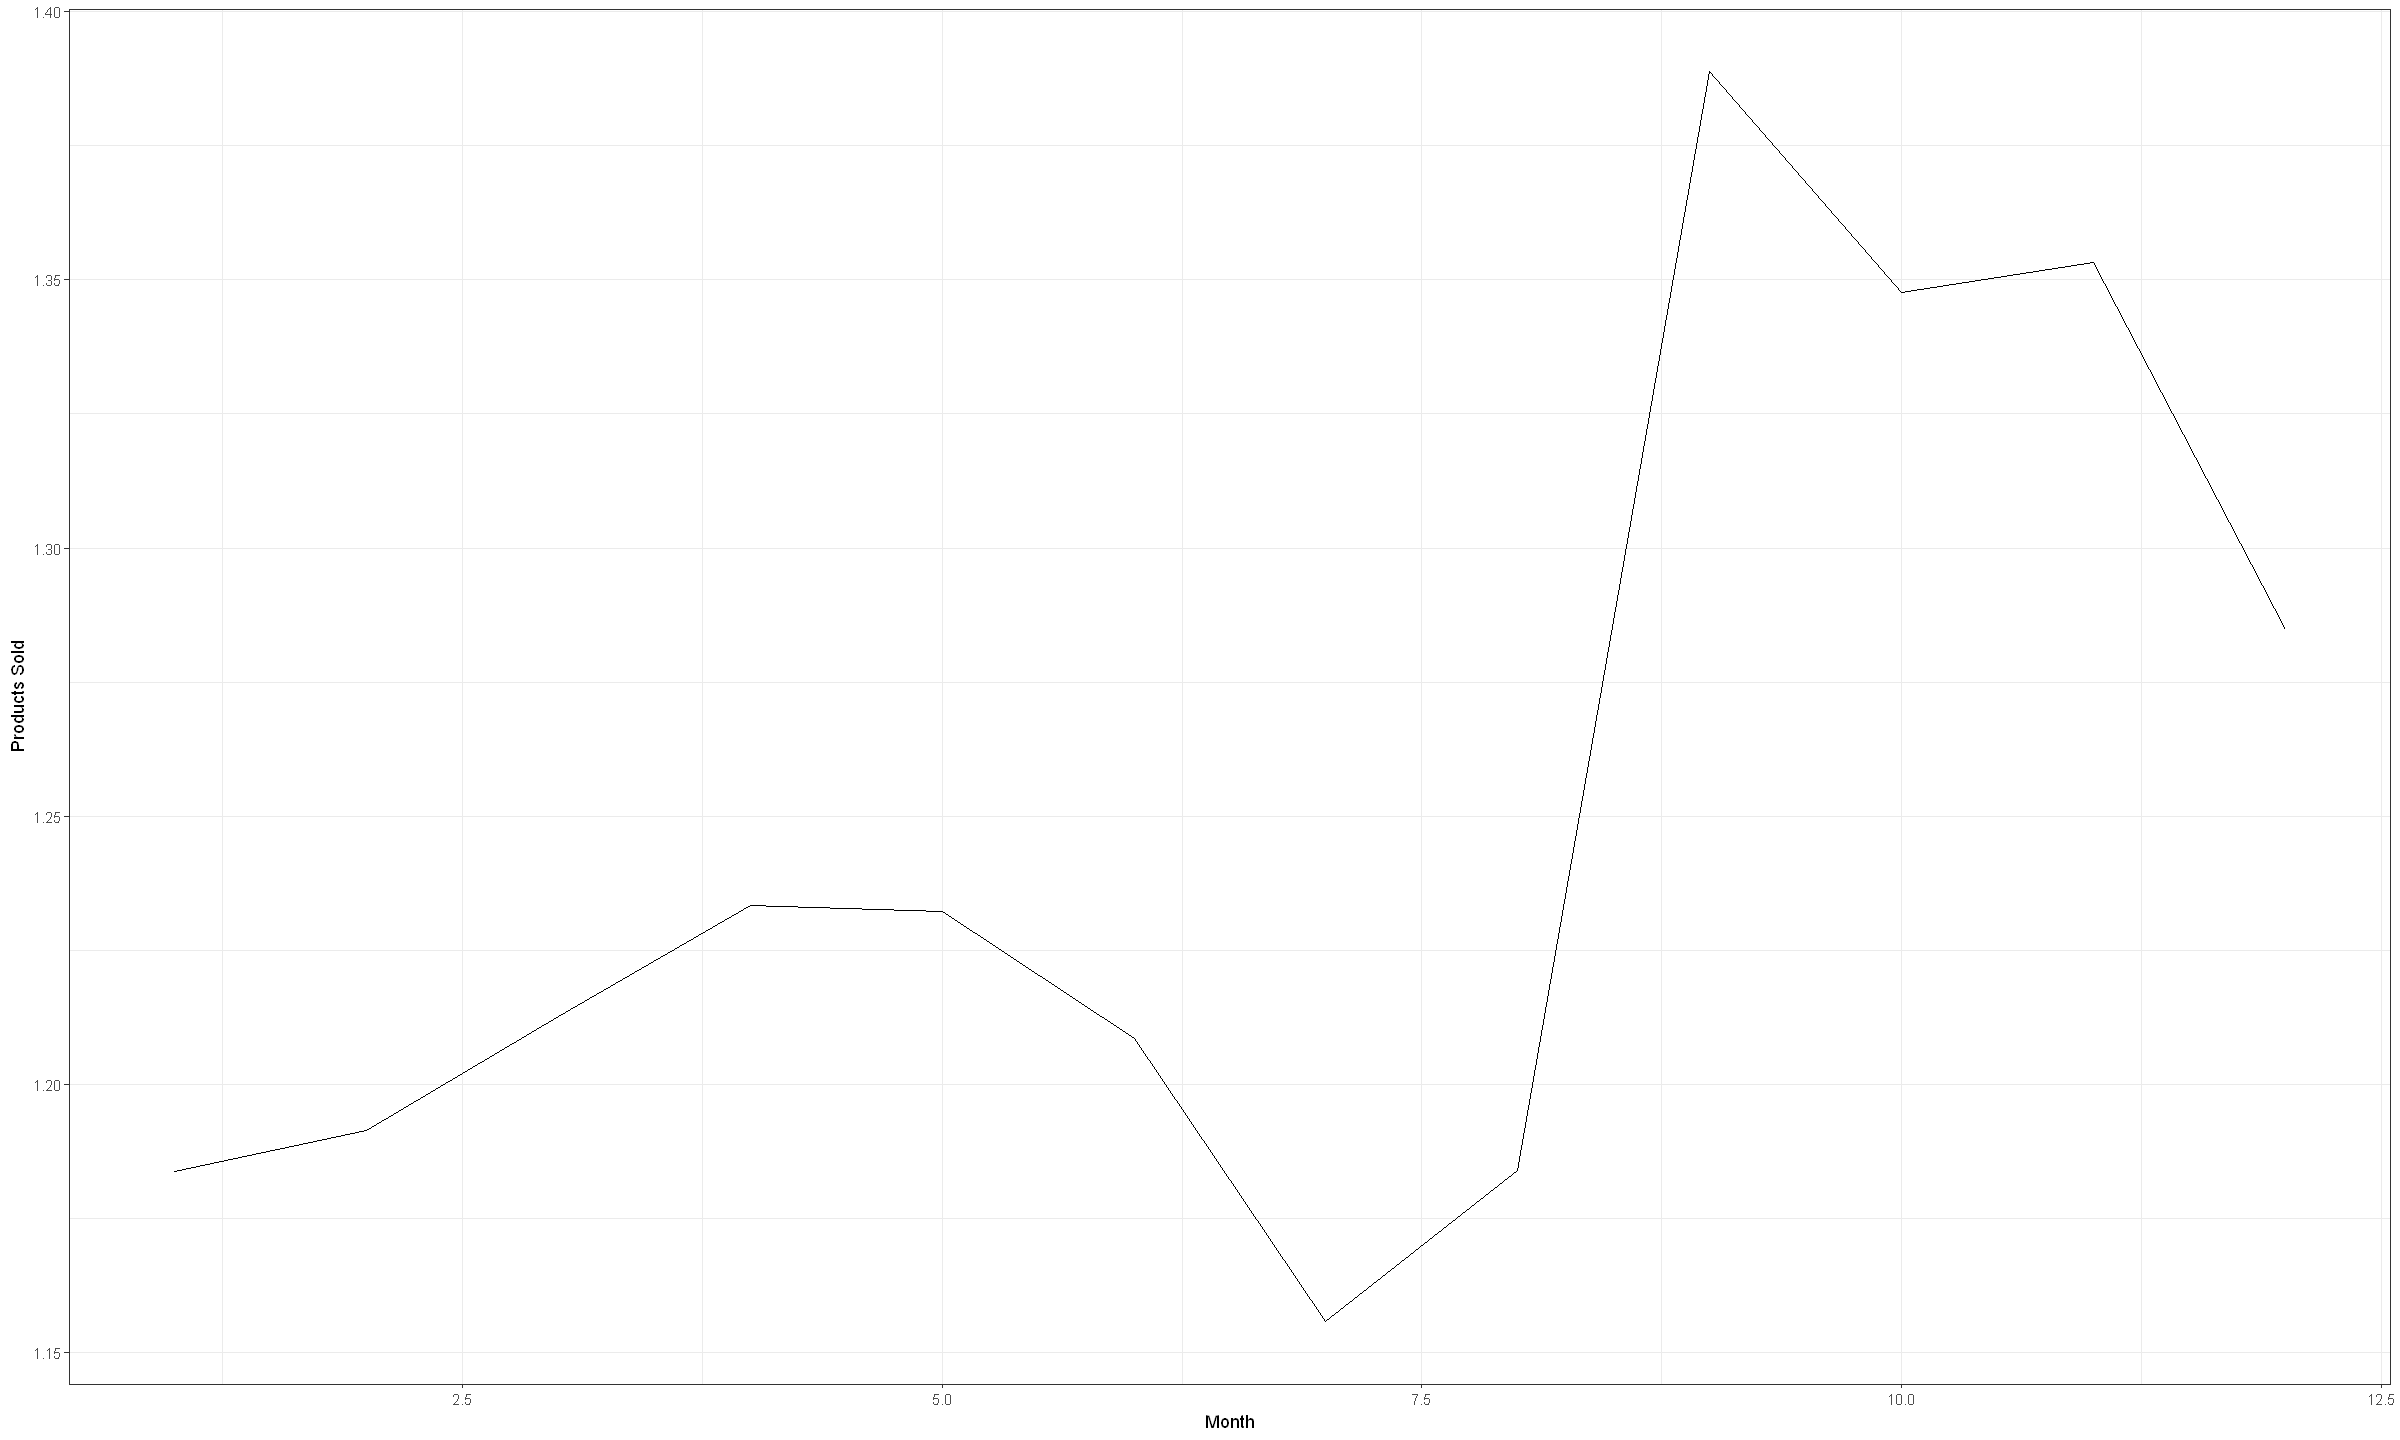

In [17]:
# Group sales data by month and calculate the mean products sold per day
sold_products_month <- sales %>%
  group_by(month) %>%
  summarise(sold_products = mean(item_cnt_day, na.rm = TRUE)) %>%
  arrange(desc(sold_products))

# Plot a line chart showing the average products sold per day for each month
ggplot(data = sold_products_month, aes(x = month, y = sold_products)) + 
  geom_line() +
  theme_bw() +
  labs(x = "Month", y = "Products Sold")

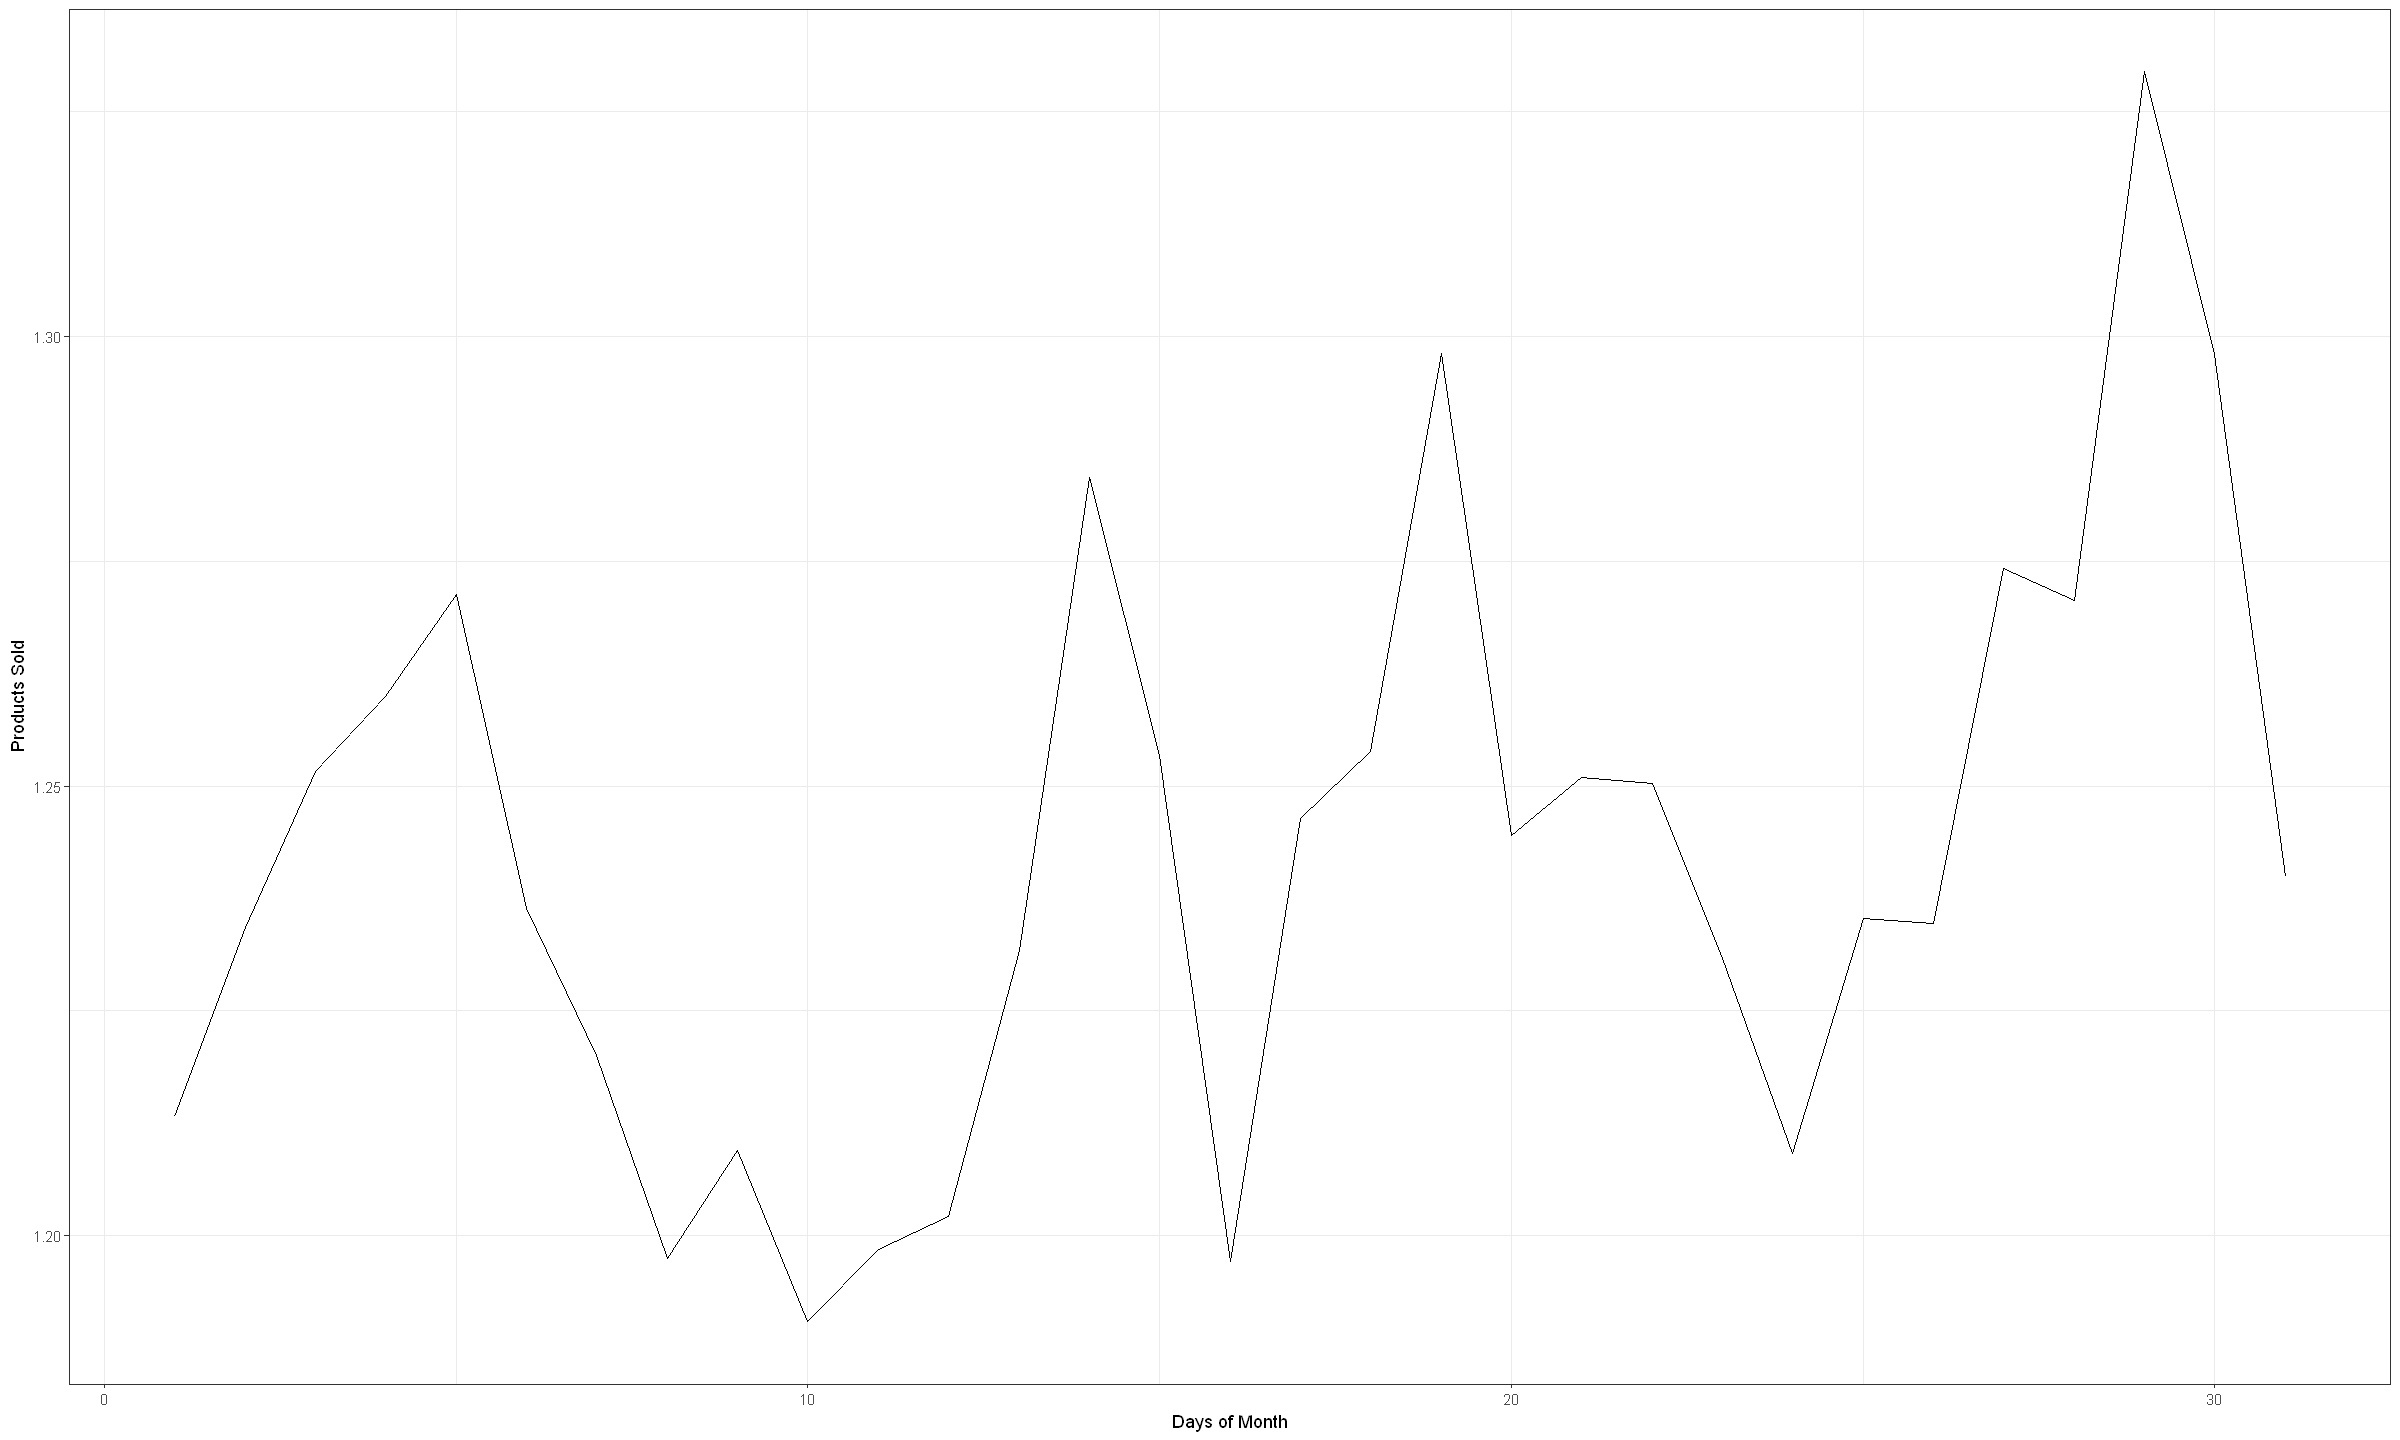

In [18]:
# Group sales data by day and calculate the mean products sold per day
sold_products_day <- sales %>%
  group_by(day) %>%
  summarise(sold_products = mean(item_cnt_day, na.rm = TRUE)) %>%
  arrange(desc(sold_products))

# Plot a line chart showing the average products sold per day for each day of the month
ggplot(data = sold_products_day, aes(x = day, y = sold_products)) +
  geom_line() +
  theme_bw() +
  labs(x = "Days of Month", y = "Products Sold")


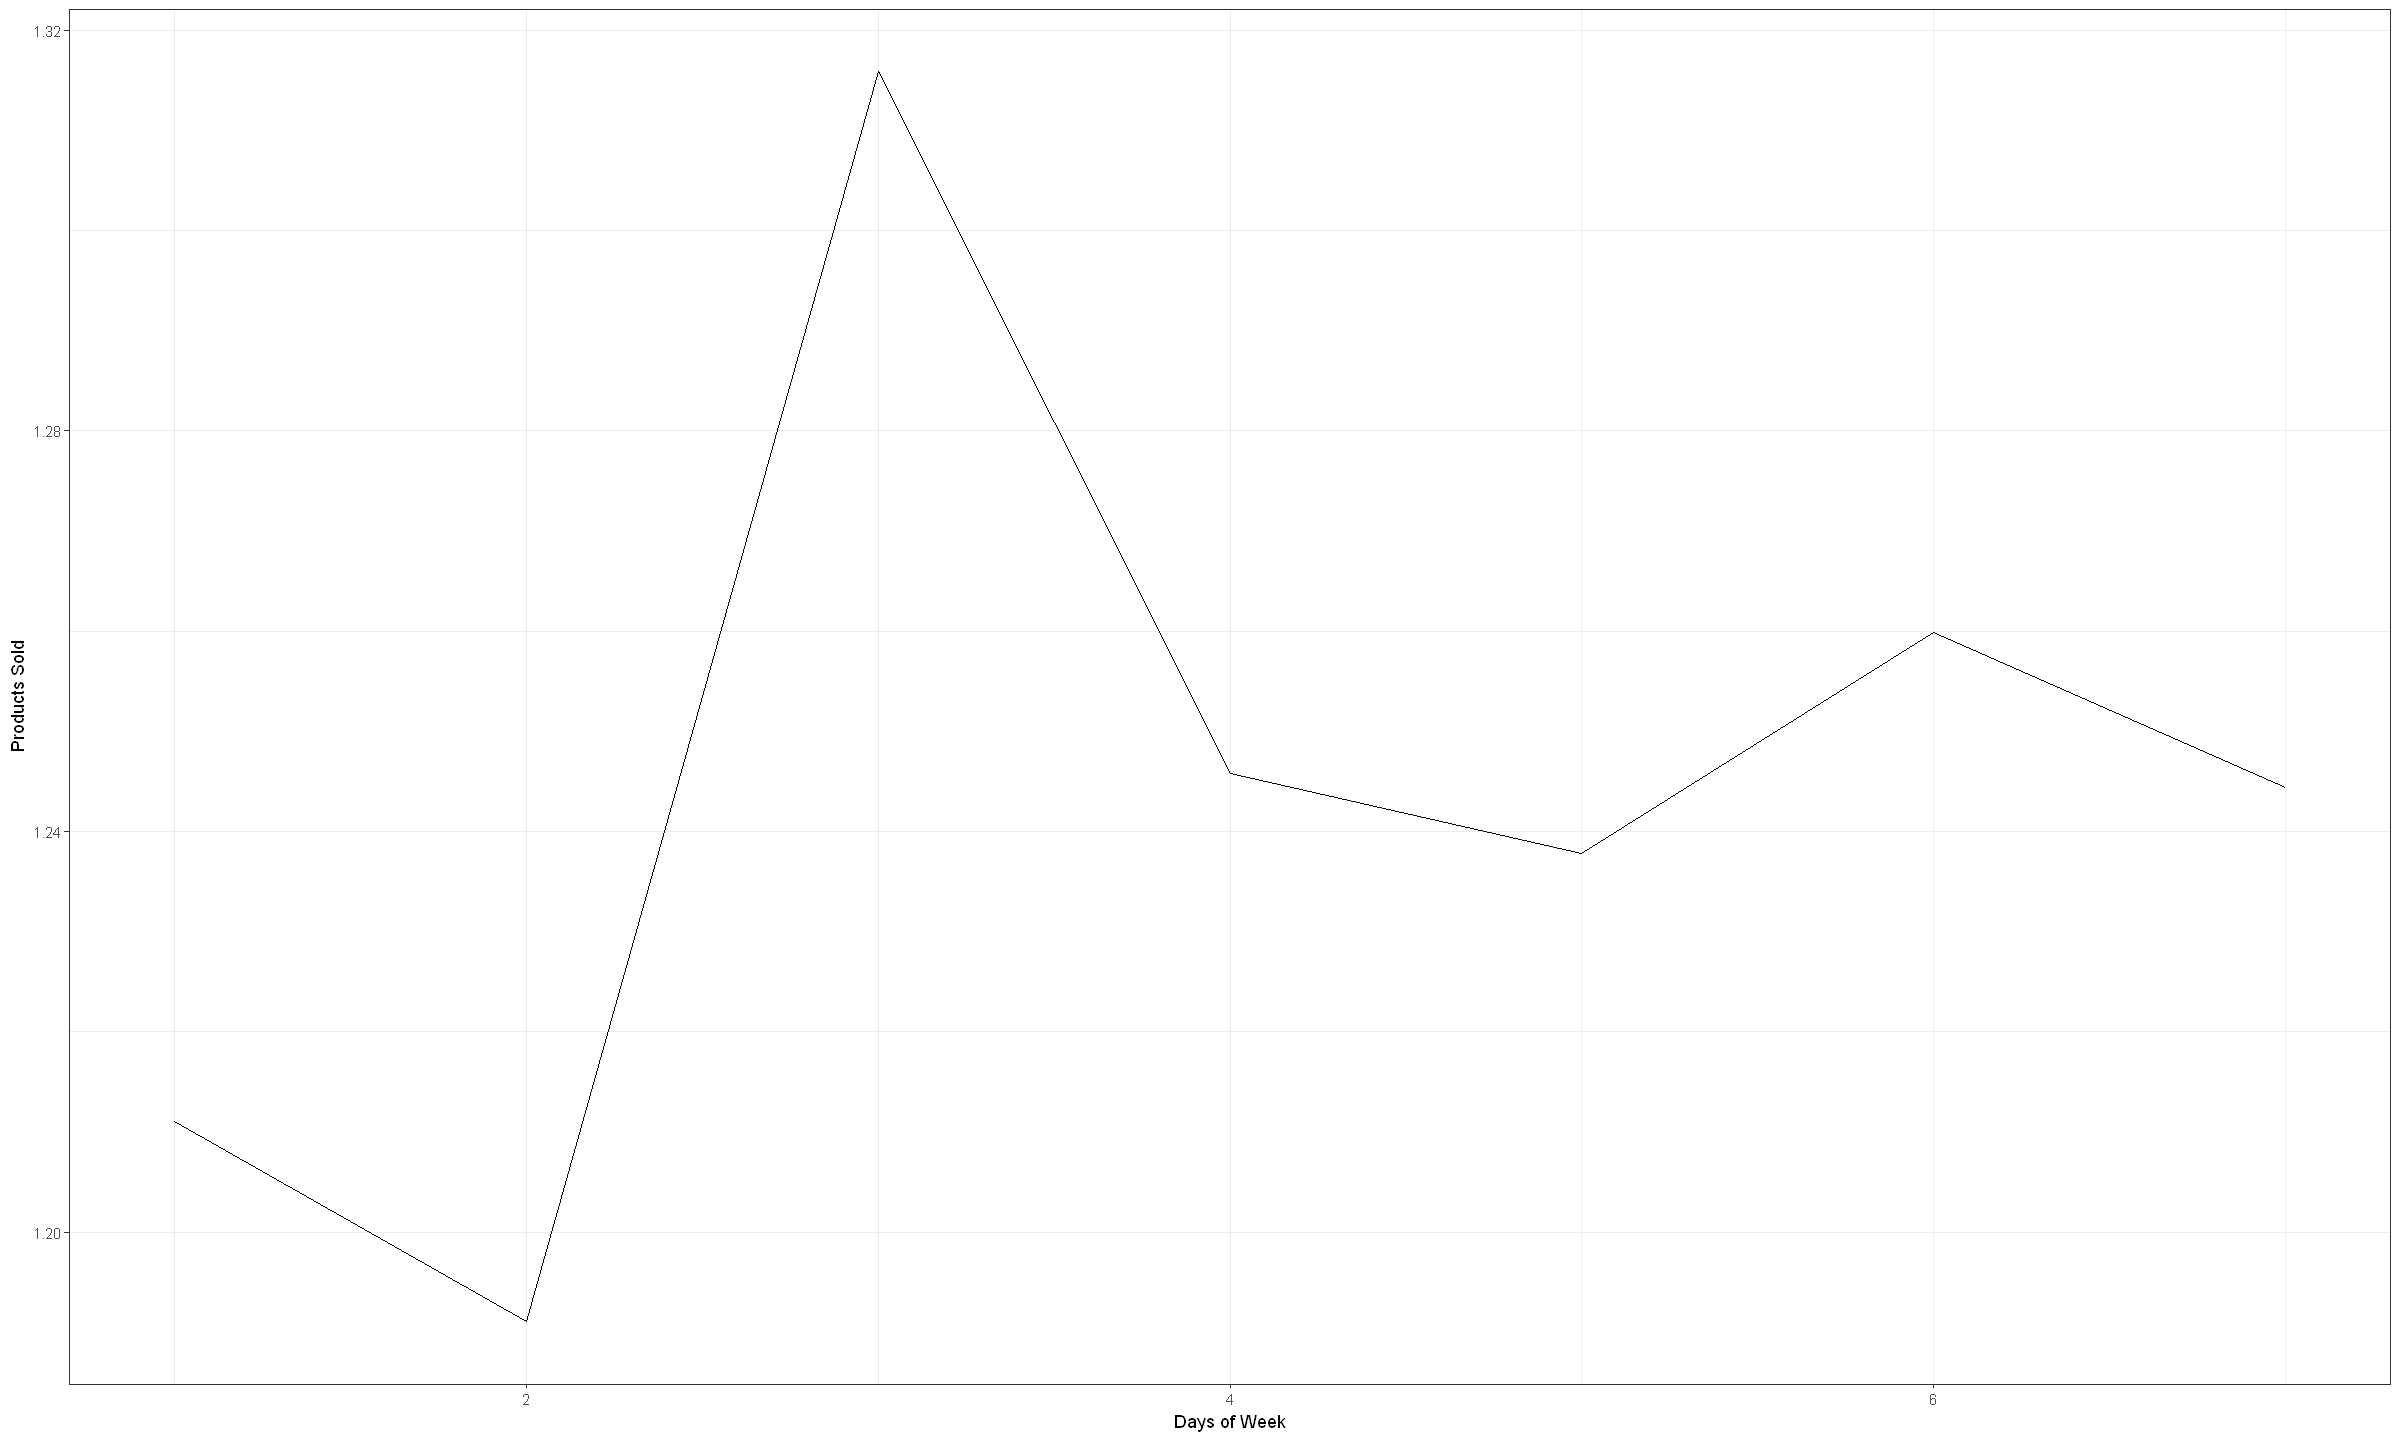

In [19]:
# Group sales data by day of the week and calculate the mean products sold per day
sold_products_day_w <- sales %>%
  group_by(day_w) %>%
  summarise(sold_products = mean(item_cnt_day, na.rm = TRUE)) %>%
  arrange(desc(sold_products))

# Plot a line chart showing the average products sold per day for each day of the week
ggplot(data = sold_products_day_w, aes(x = day_w, y = sold_products)) +
  geom_line() +
  theme_bw() +
  labs(x = "Days of Week", y = "Products Sold")


In [20]:
# Group sales data by date block number
grouped_sales <- sales %>%
  group_by(date_block_num)

# Calculate the mean item price and total sales for each date block
sales_prices <- grouped_sales %>%
  summarise(
    mean_price = mean(item_price, na.rm = TRUE),  # Calculate mean item price
    sales = sum(item_cnt_day, na.rm = TRUE)  # Calculate total sales
  )

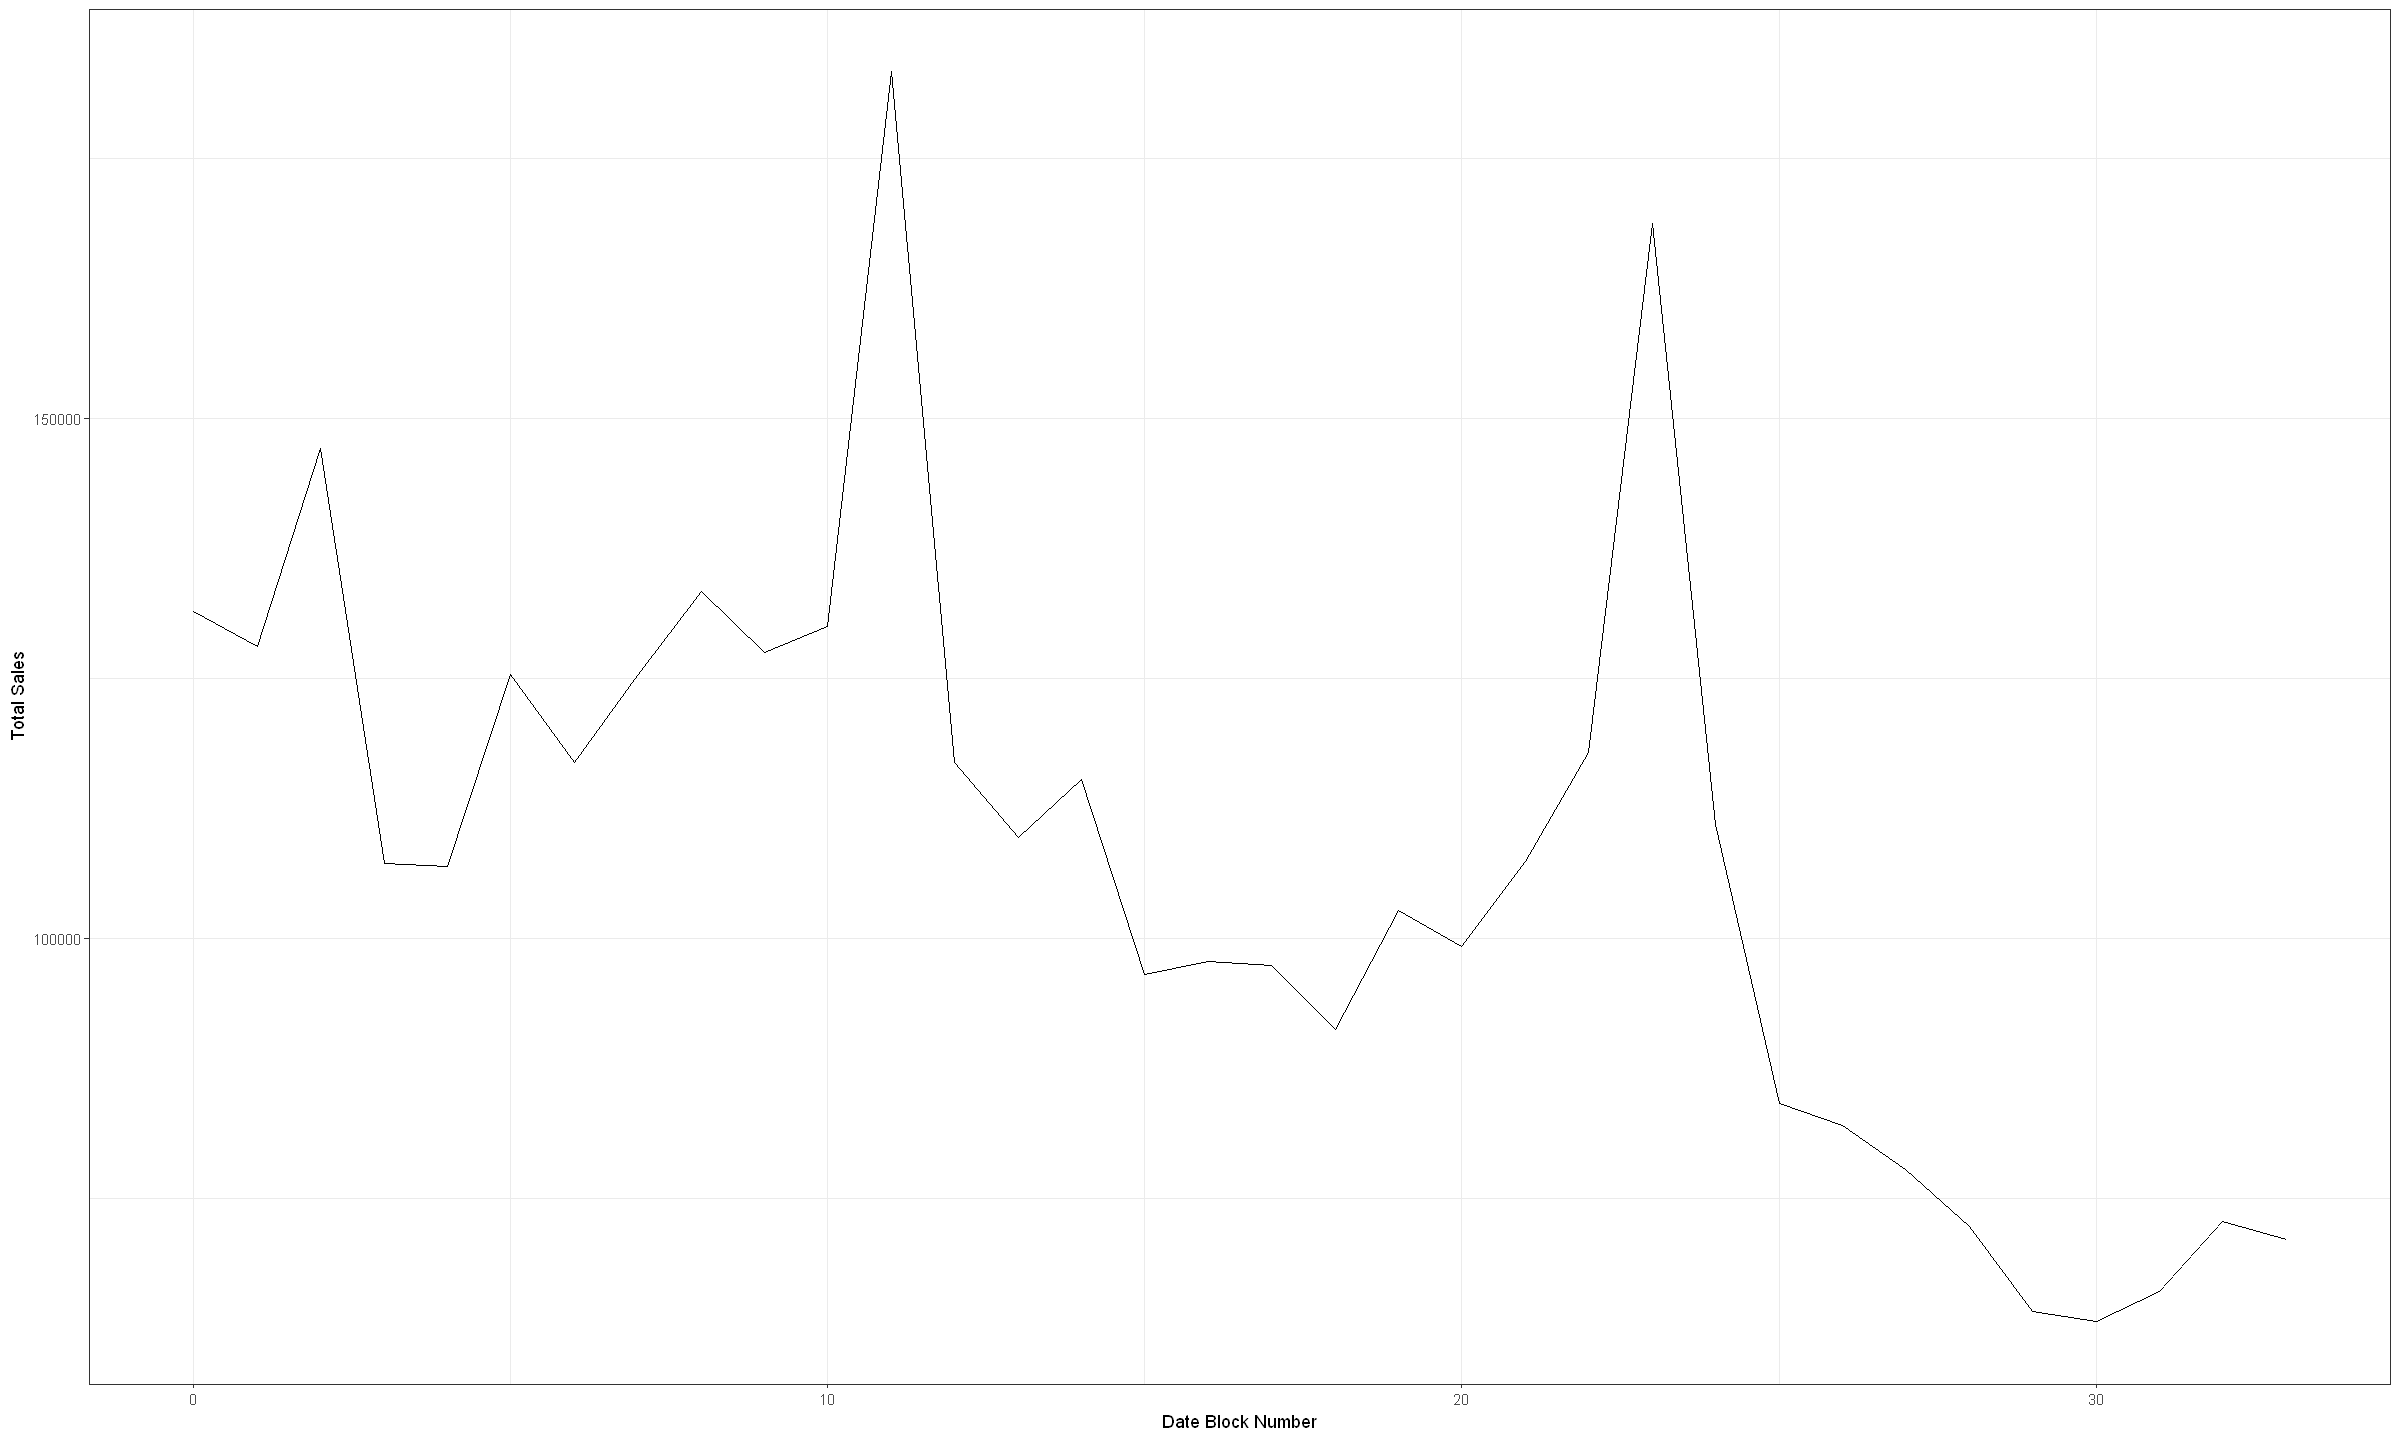

In [21]:
# Plot a line chart showing the total sales over time
ggplot(data = sales_prices, aes(x = date_block_num, y = sales)) +
  geom_line() +  # Line plot for total sales
  theme_bw() +  # Apply a black and white theme
  labs(x = "Date Block Number", y = "Total Sales")  # Label x and y axes


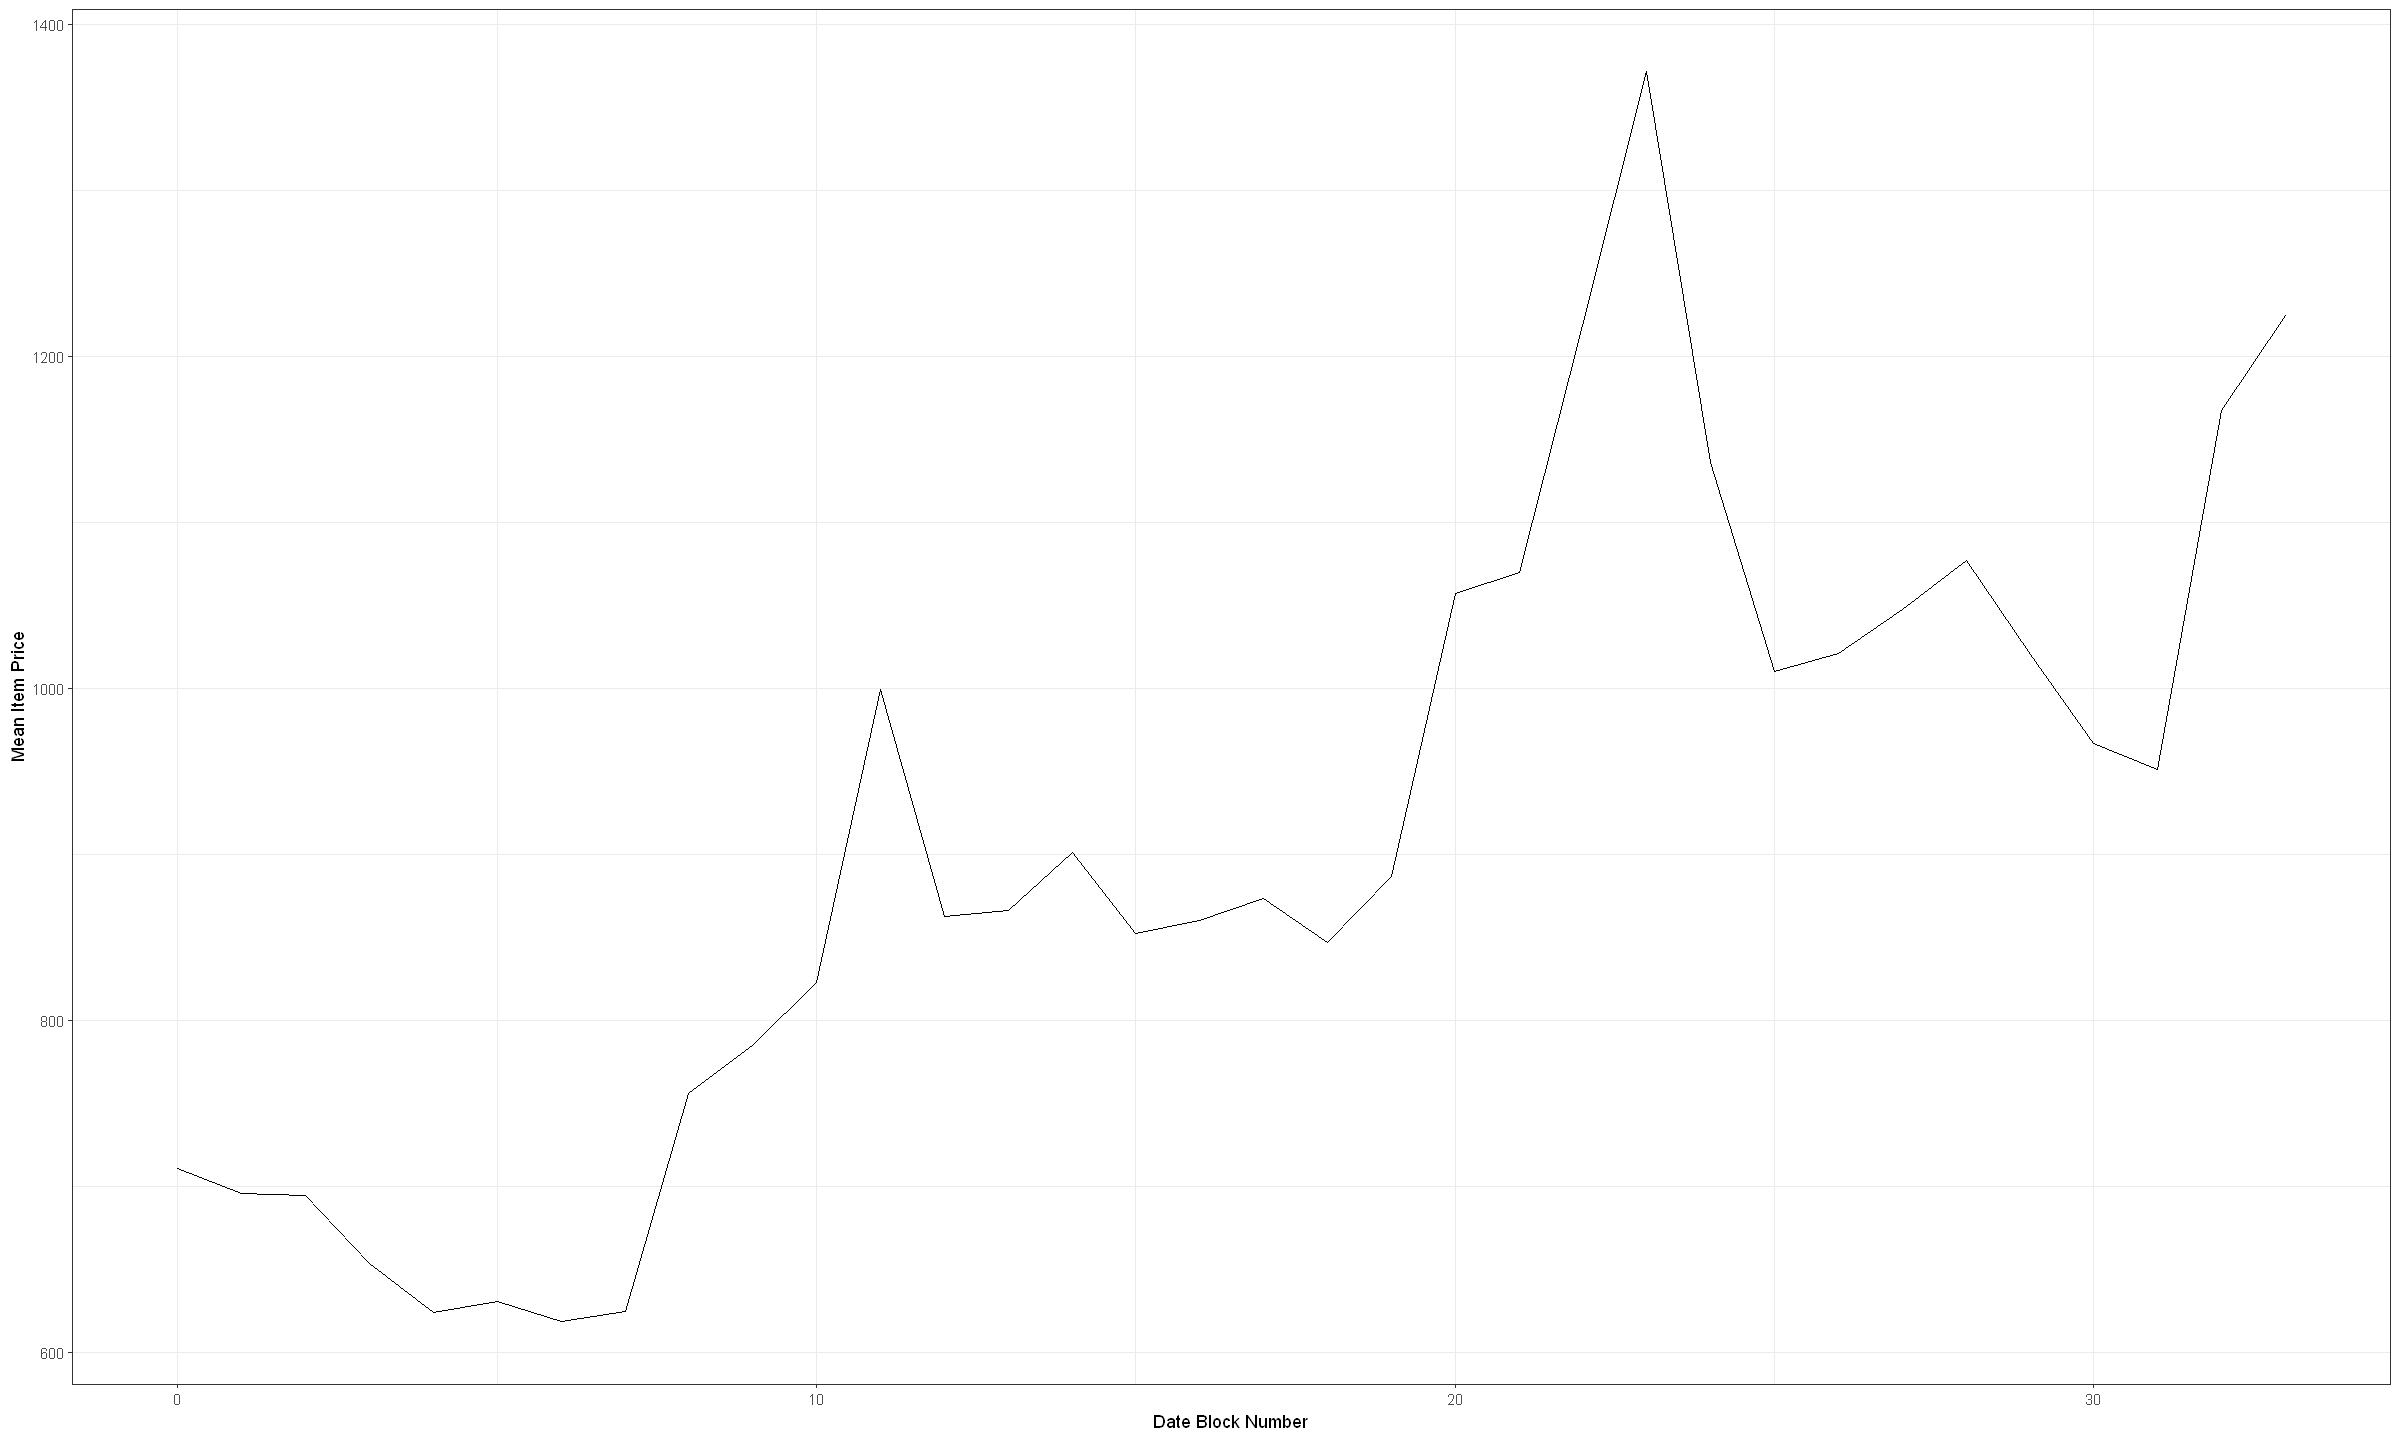

In [22]:
# Plot a line chart showing the mean item price over time
ggplot(data = sales_prices, aes(x = date_block_num, y = mean_price)) +
  geom_line() +  # Line plot for mean item price
  theme_bw() +  # Apply a black and white theme
  labs(x = "Date Block Number", y = "Mean Item Price")  # Label x and y axes


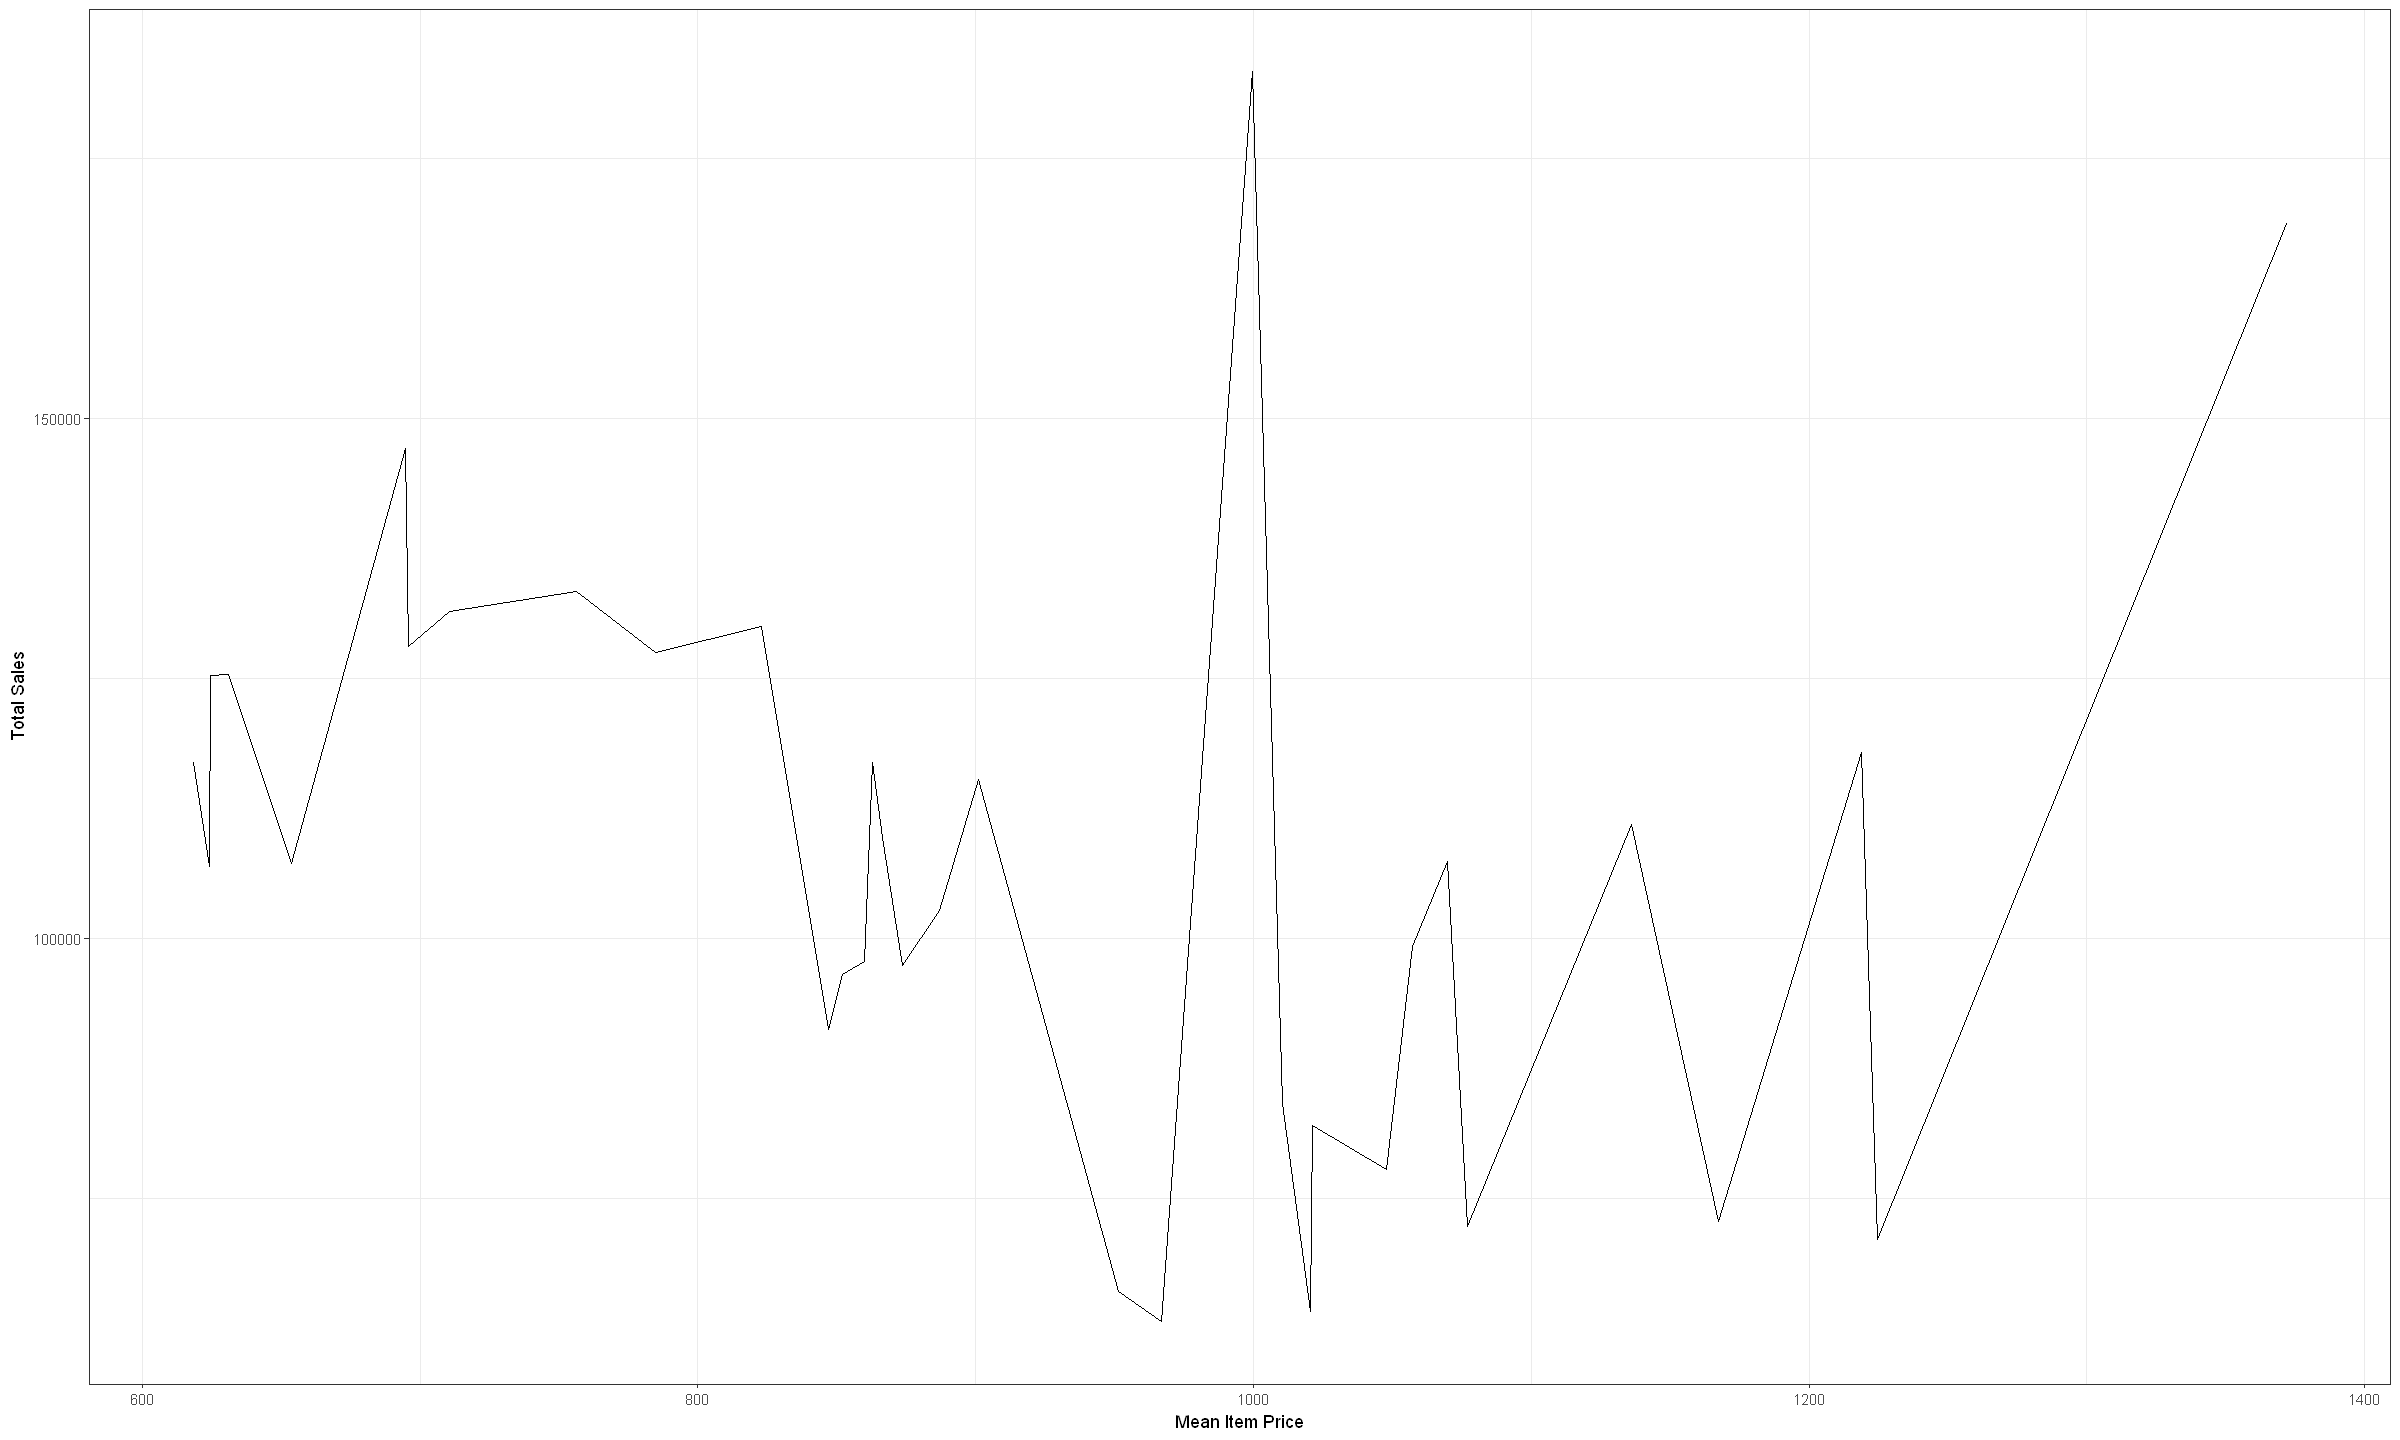

In [23]:
# Plot a line chart showing the relationship between mean item price and total sales
ggplot(data = sales_prices, aes(x = mean_price, y = sales)) +
  geom_line() +  # Line plot for mean item price vs. total sales
  theme_bw() +  # Apply a black and white theme
  labs(x = "Mean Item Price", y = "Total Sales")  # Label x and y axes


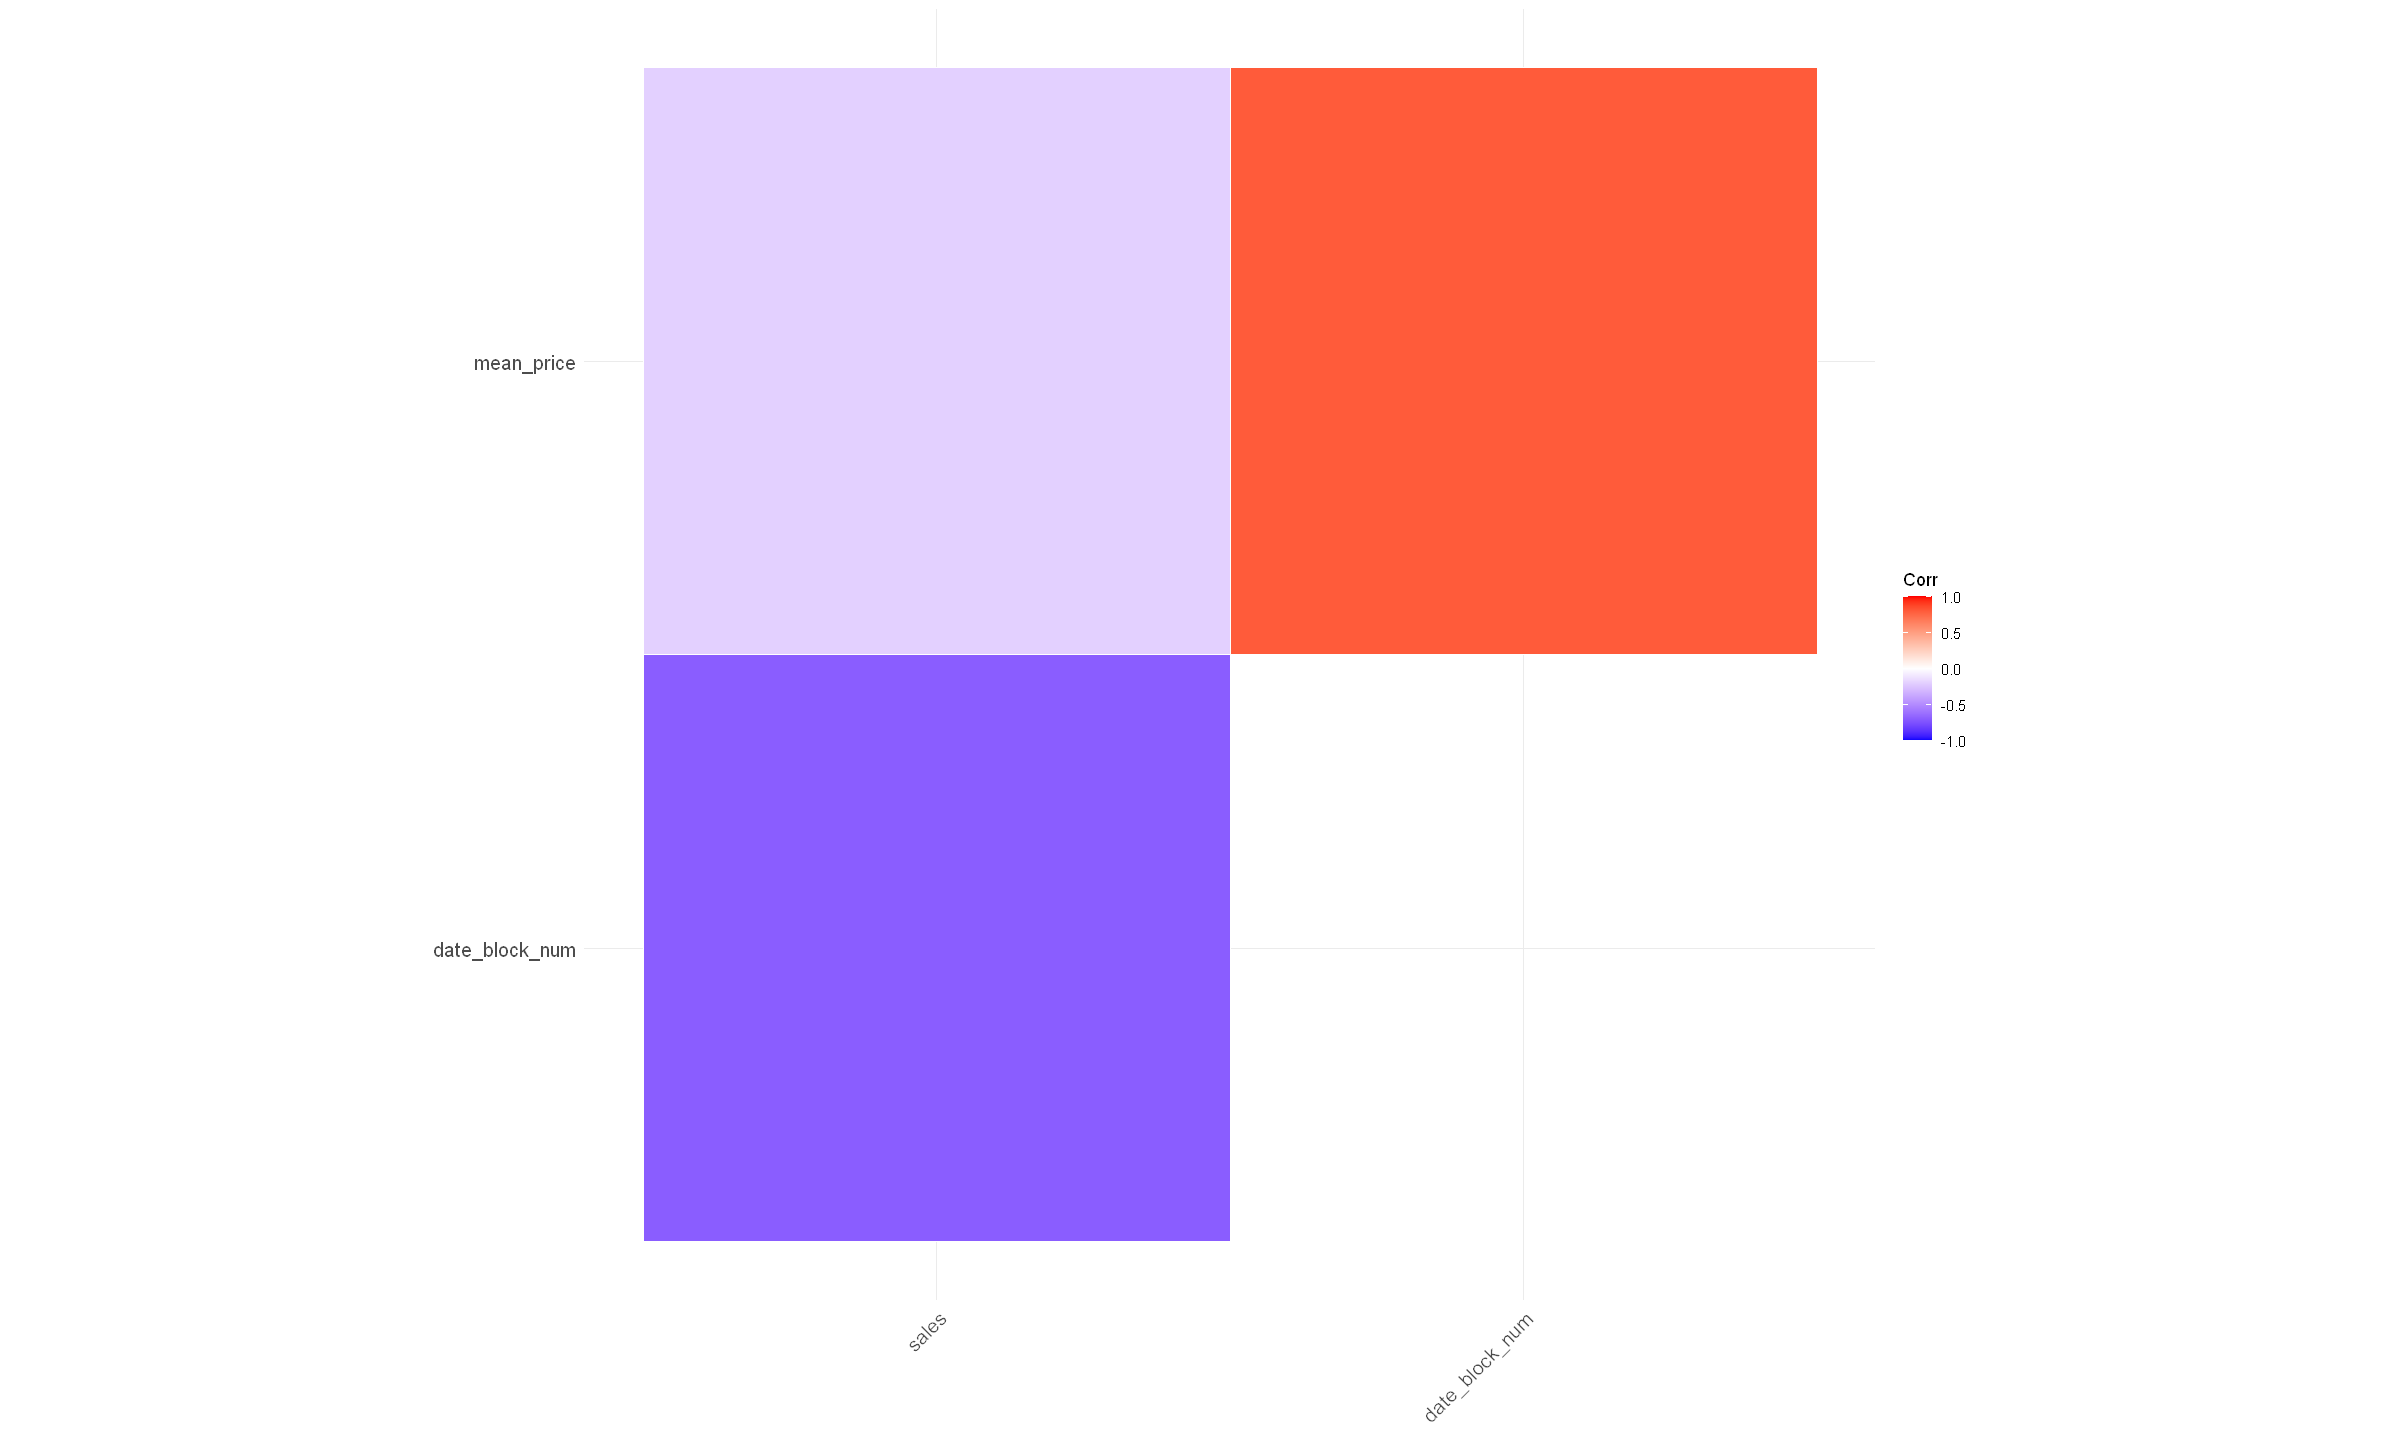

In [24]:
# Calculate the correlation matrix between variables in sales_prices and round to one decimal place
corr <- round(cor(sales_prices), 1)

# Plot a correlation matrix heatmap using ggcorrplot
ggcorrplot(corr, hc.order = TRUE, type = "upper", outline.col = "white")


# Remove old data
rm(sales_prices,corr)

# There appears to be a negative association between the date block number and sales, while there is a positive association between the date block number and mean price.

In [25]:
# Group sales data by shop_id and item_id, then calculate the revenue for each combination
pop_items_per_shop <- sales_train %>%
  group_by(shop_id, item_id) %>%
  summarise(Revenue = sum(item_cnt_day * item_price)) %>%
  filter(Revenue == max(Revenue)) %>%  # Filter to keep only the combinations with maximum revenue
  arrange(desc(Revenue)) %>%  # Arrange in descending order of revenue
  ungroup()  # Ungroup the data frame

# Display the first few rows of the dataframe to see the most profitable item per shop
head(pop_items_per_shop)

`summarise()` has grouped output by 'shop_id'. You can override using the `.groups` argument.


shop_id,item_id,Revenue
<int>,<int>,<dbl>
12,6675,14259410
25,6675,11492498
31,6675,11137995
42,6675,10744985
27,6675,8765751
28,6675,7591286


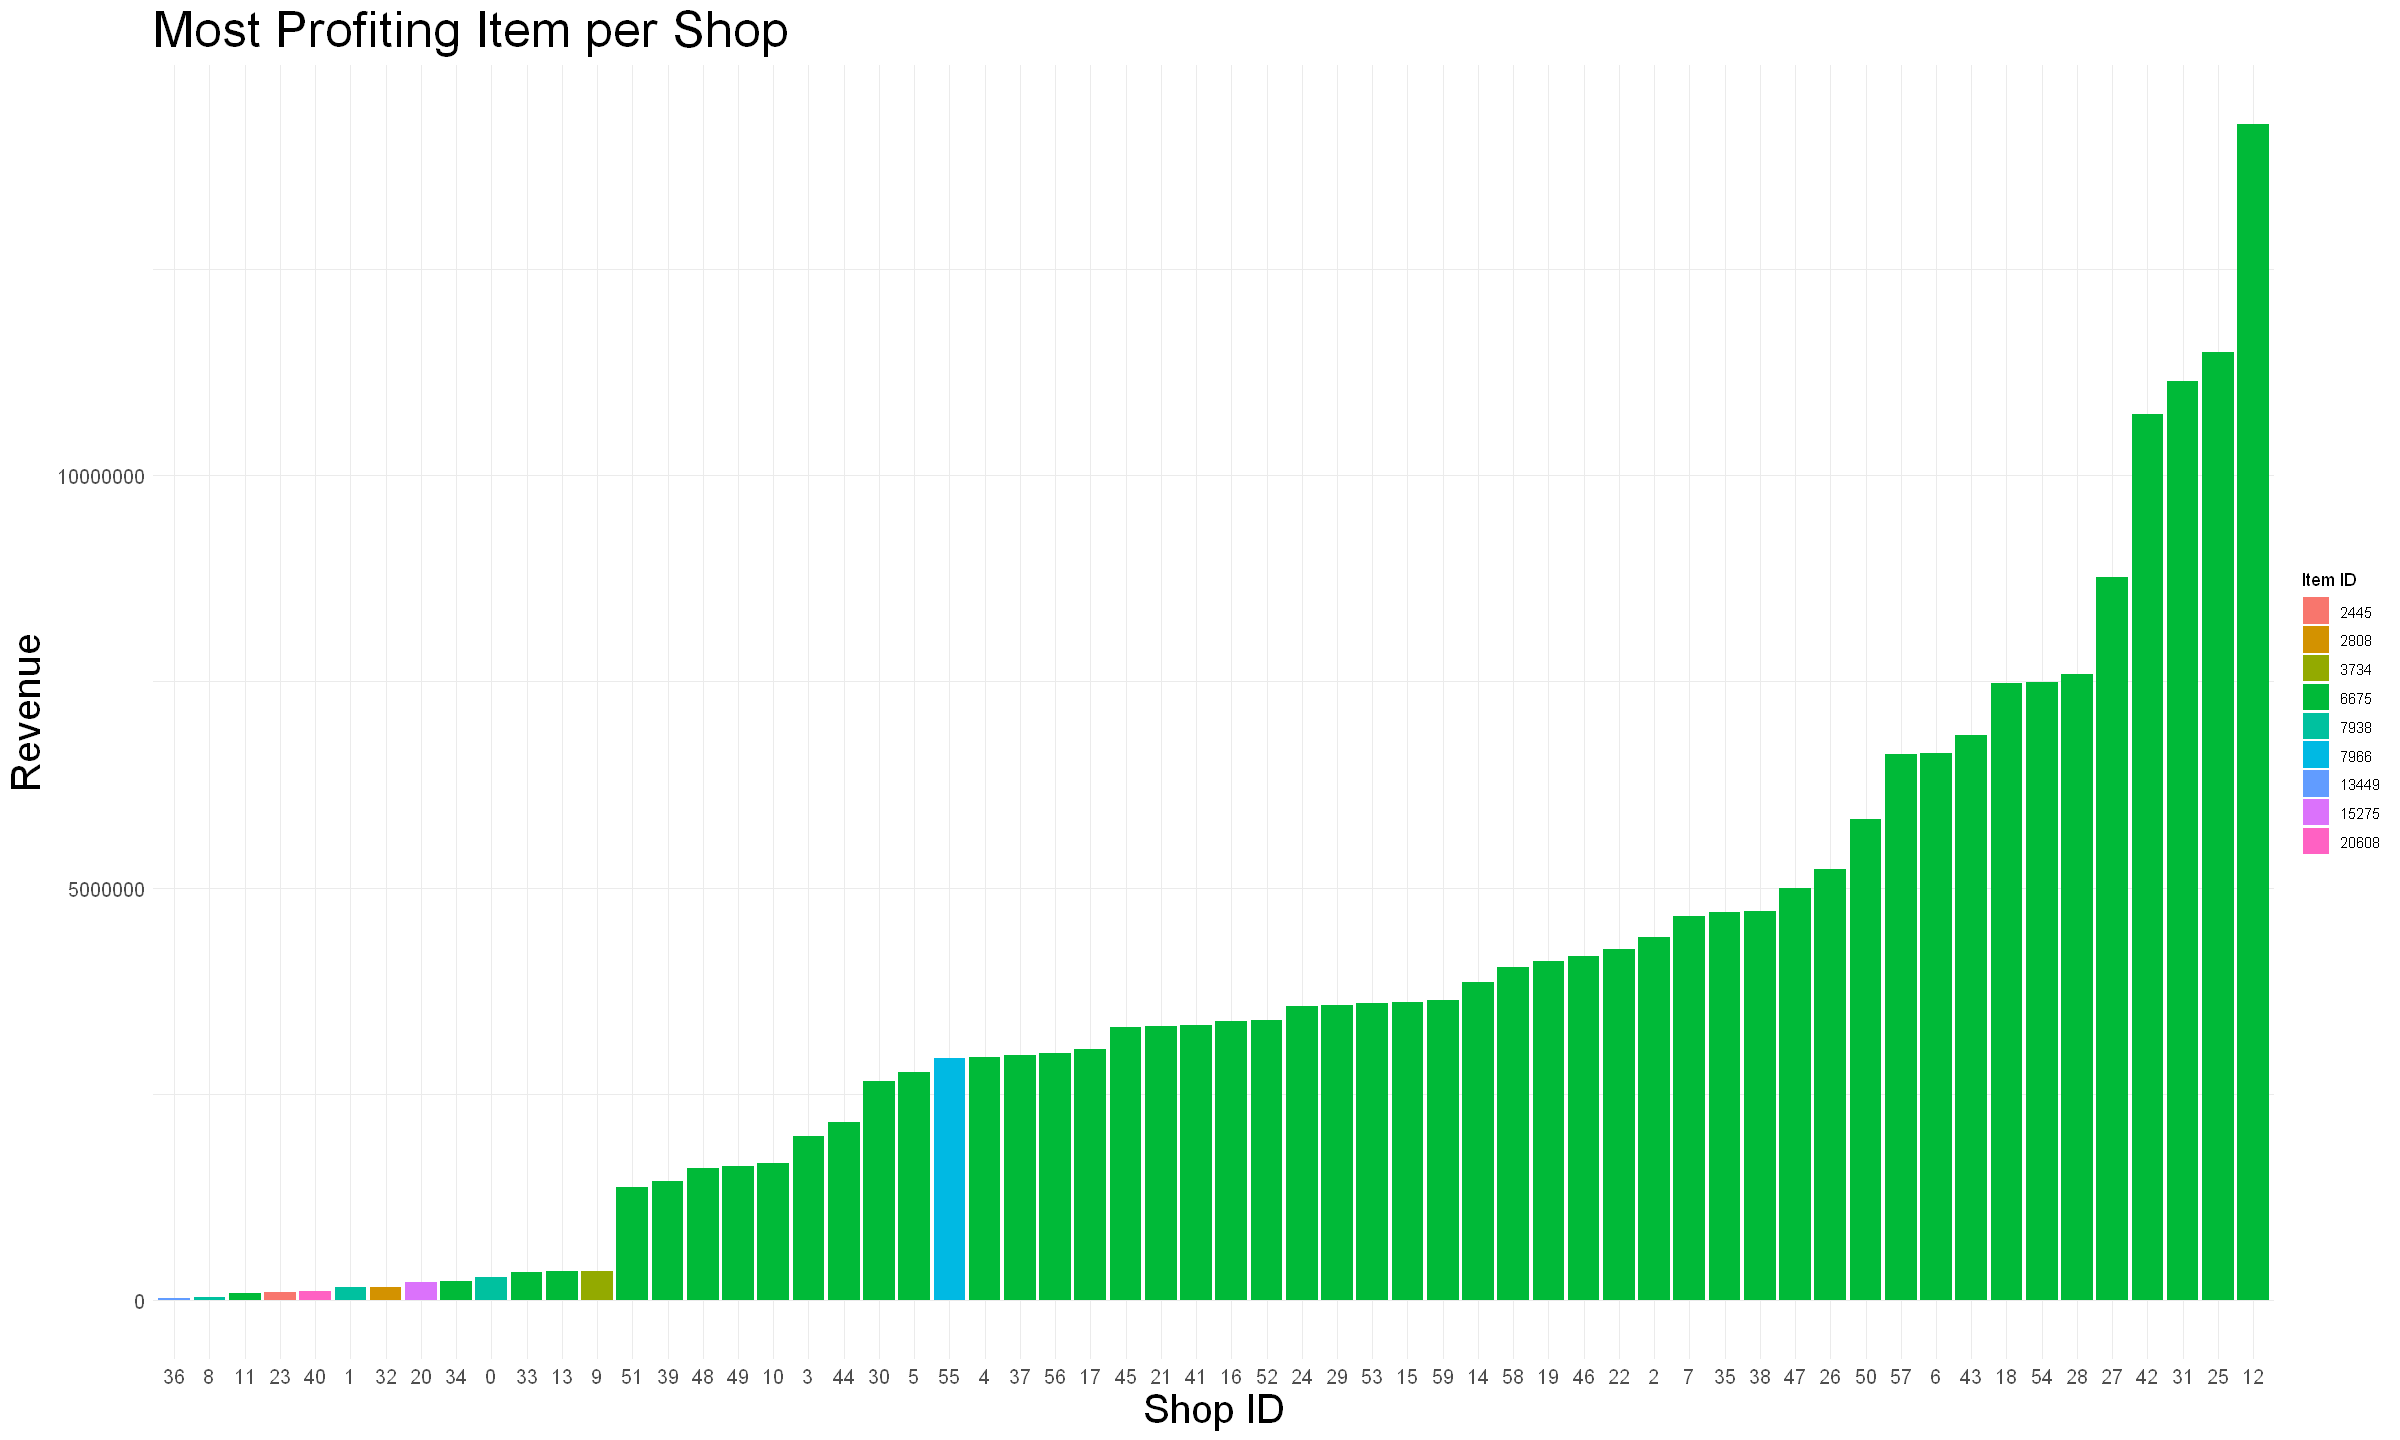

In [26]:
# Set the width and height of the plot to be displayed in the output
options(repr.plot.width = 20, repr.plot.height = 12)

# Plot a bar chart showing the revenue for the most profitable item per shop
ggplot(data = pop_items_per_shop, aes(x = reorder(shop_id, Revenue), y = Revenue, fill = as.factor(item_id))) + 
  geom_bar(stat = "identity") +  # Plot bars with heights corresponding to revenue
  labs(title = "Most Profiting Item per Shop", x = "Shop ID", y = "Revenue", fill = "Item ID") +  # Add plot title and axis labels
  theme_minimal() +  # Apply a minimal theme
  theme(
    plot.title = element_text(size = 30),  # Increase title size
    axis.title.x = element_text(size = 24),  # Increase x-axis label size
    axis.title.y = element_text(size = 24),  # Increase y-axis label size
    axis.text.x = element_text(size = 12),  # Increase x-axis tick label size
    axis.text.y = element_text(size = 12)   # Increase y-axis tick label size
  )
# # Save the plot with increased width and height
# ggsave("plot.png", plot, width = 20, height = 12)

`summarise()` has grouped output by 'year', 'month', 'date_block_num', 'shop_id', 'item_id'. You can override using the
`.groups` argument.


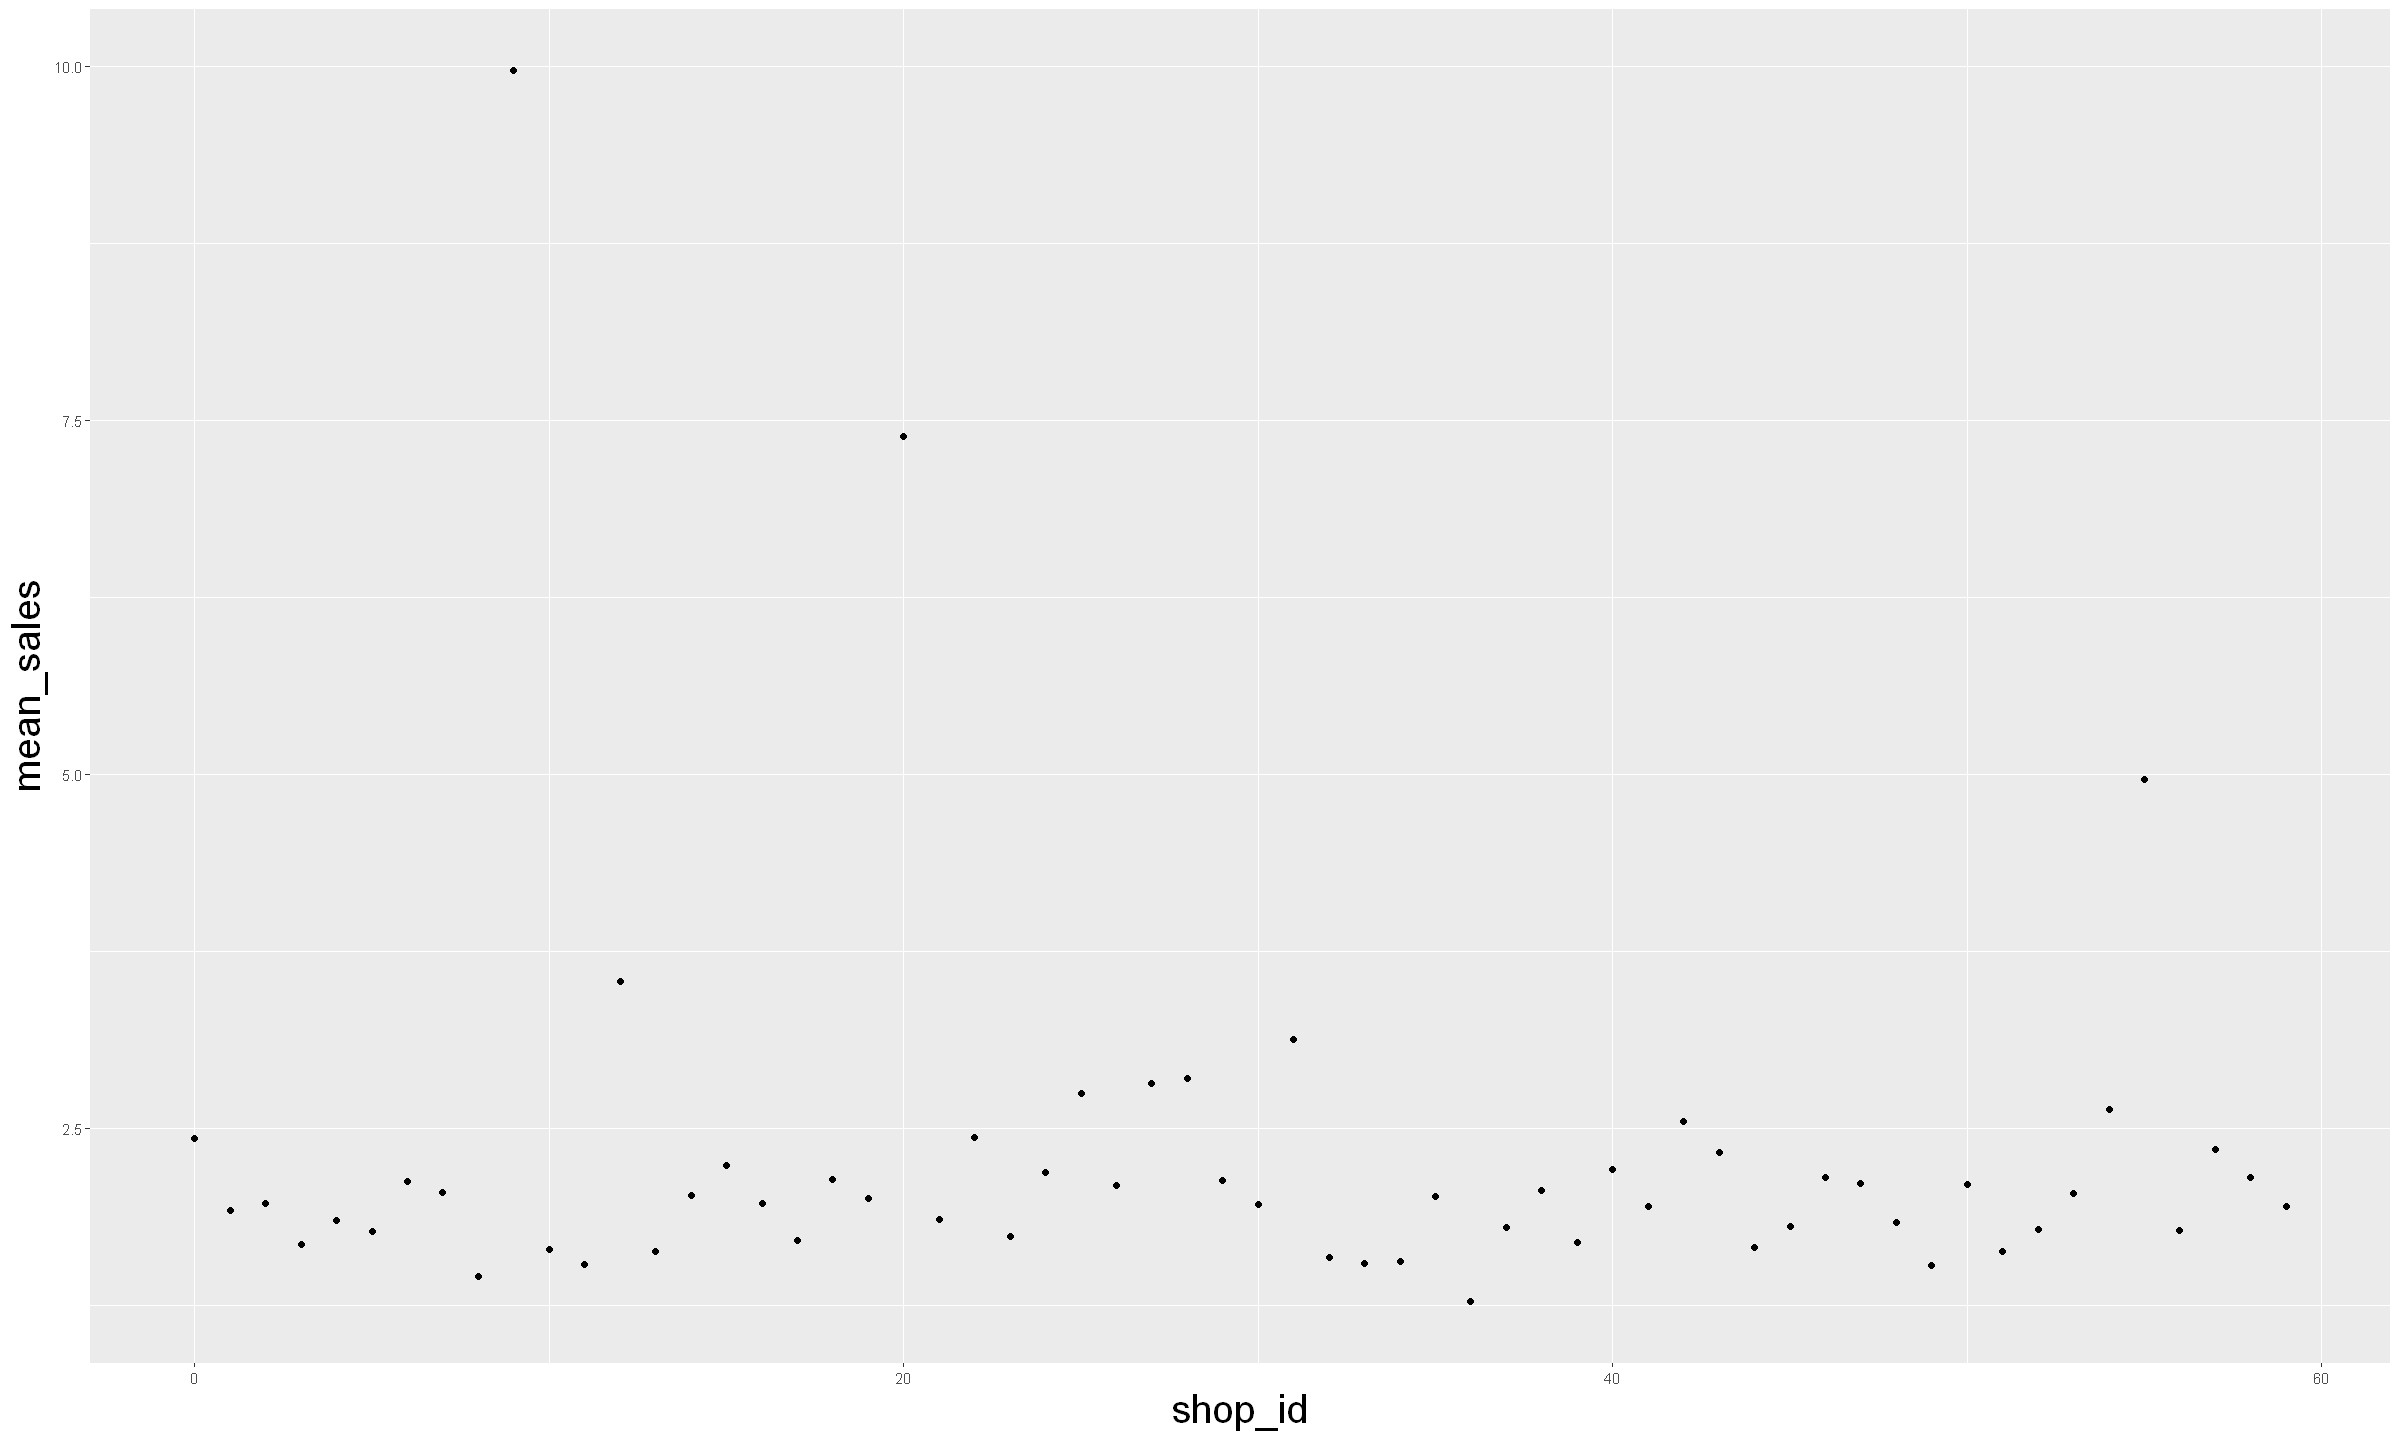

In [27]:
# Calculate monthly sales and mean price per item per shop
sales_month <- sales %>% 
  group_by(year, month, date_block_num, shop_id, item_id, item_category_id) %>% 
  summarise(
    item_cnt_month = sum(item_cnt_day, na.rm = TRUE),  # Total items sold in the month
    mean_price = mean(item_price, na.rm = TRUE)  # Mean price of the item
  ) %>% 
  ungroup()

# Calculate mean monthly sales per shop
sales_month_shops <- sales_month %>%  
  group_by(shop_id) %>% 
  summarise(mean_sales = mean(item_cnt_month, na.rm = TRUE))  # Mean monthly sales per shop

# Plot mean monthly sales per shop
ggplot(data = sales_month_shops, aes(x = shop_id, y = mean_sales)) + 
  geom_point() +  # Plot points for mean sales
  theme(axis.title.x = element_text(size = 24),  # Increase x-axis label size
        axis.title.y = element_text(size = 24))  # Increase y-axis label size


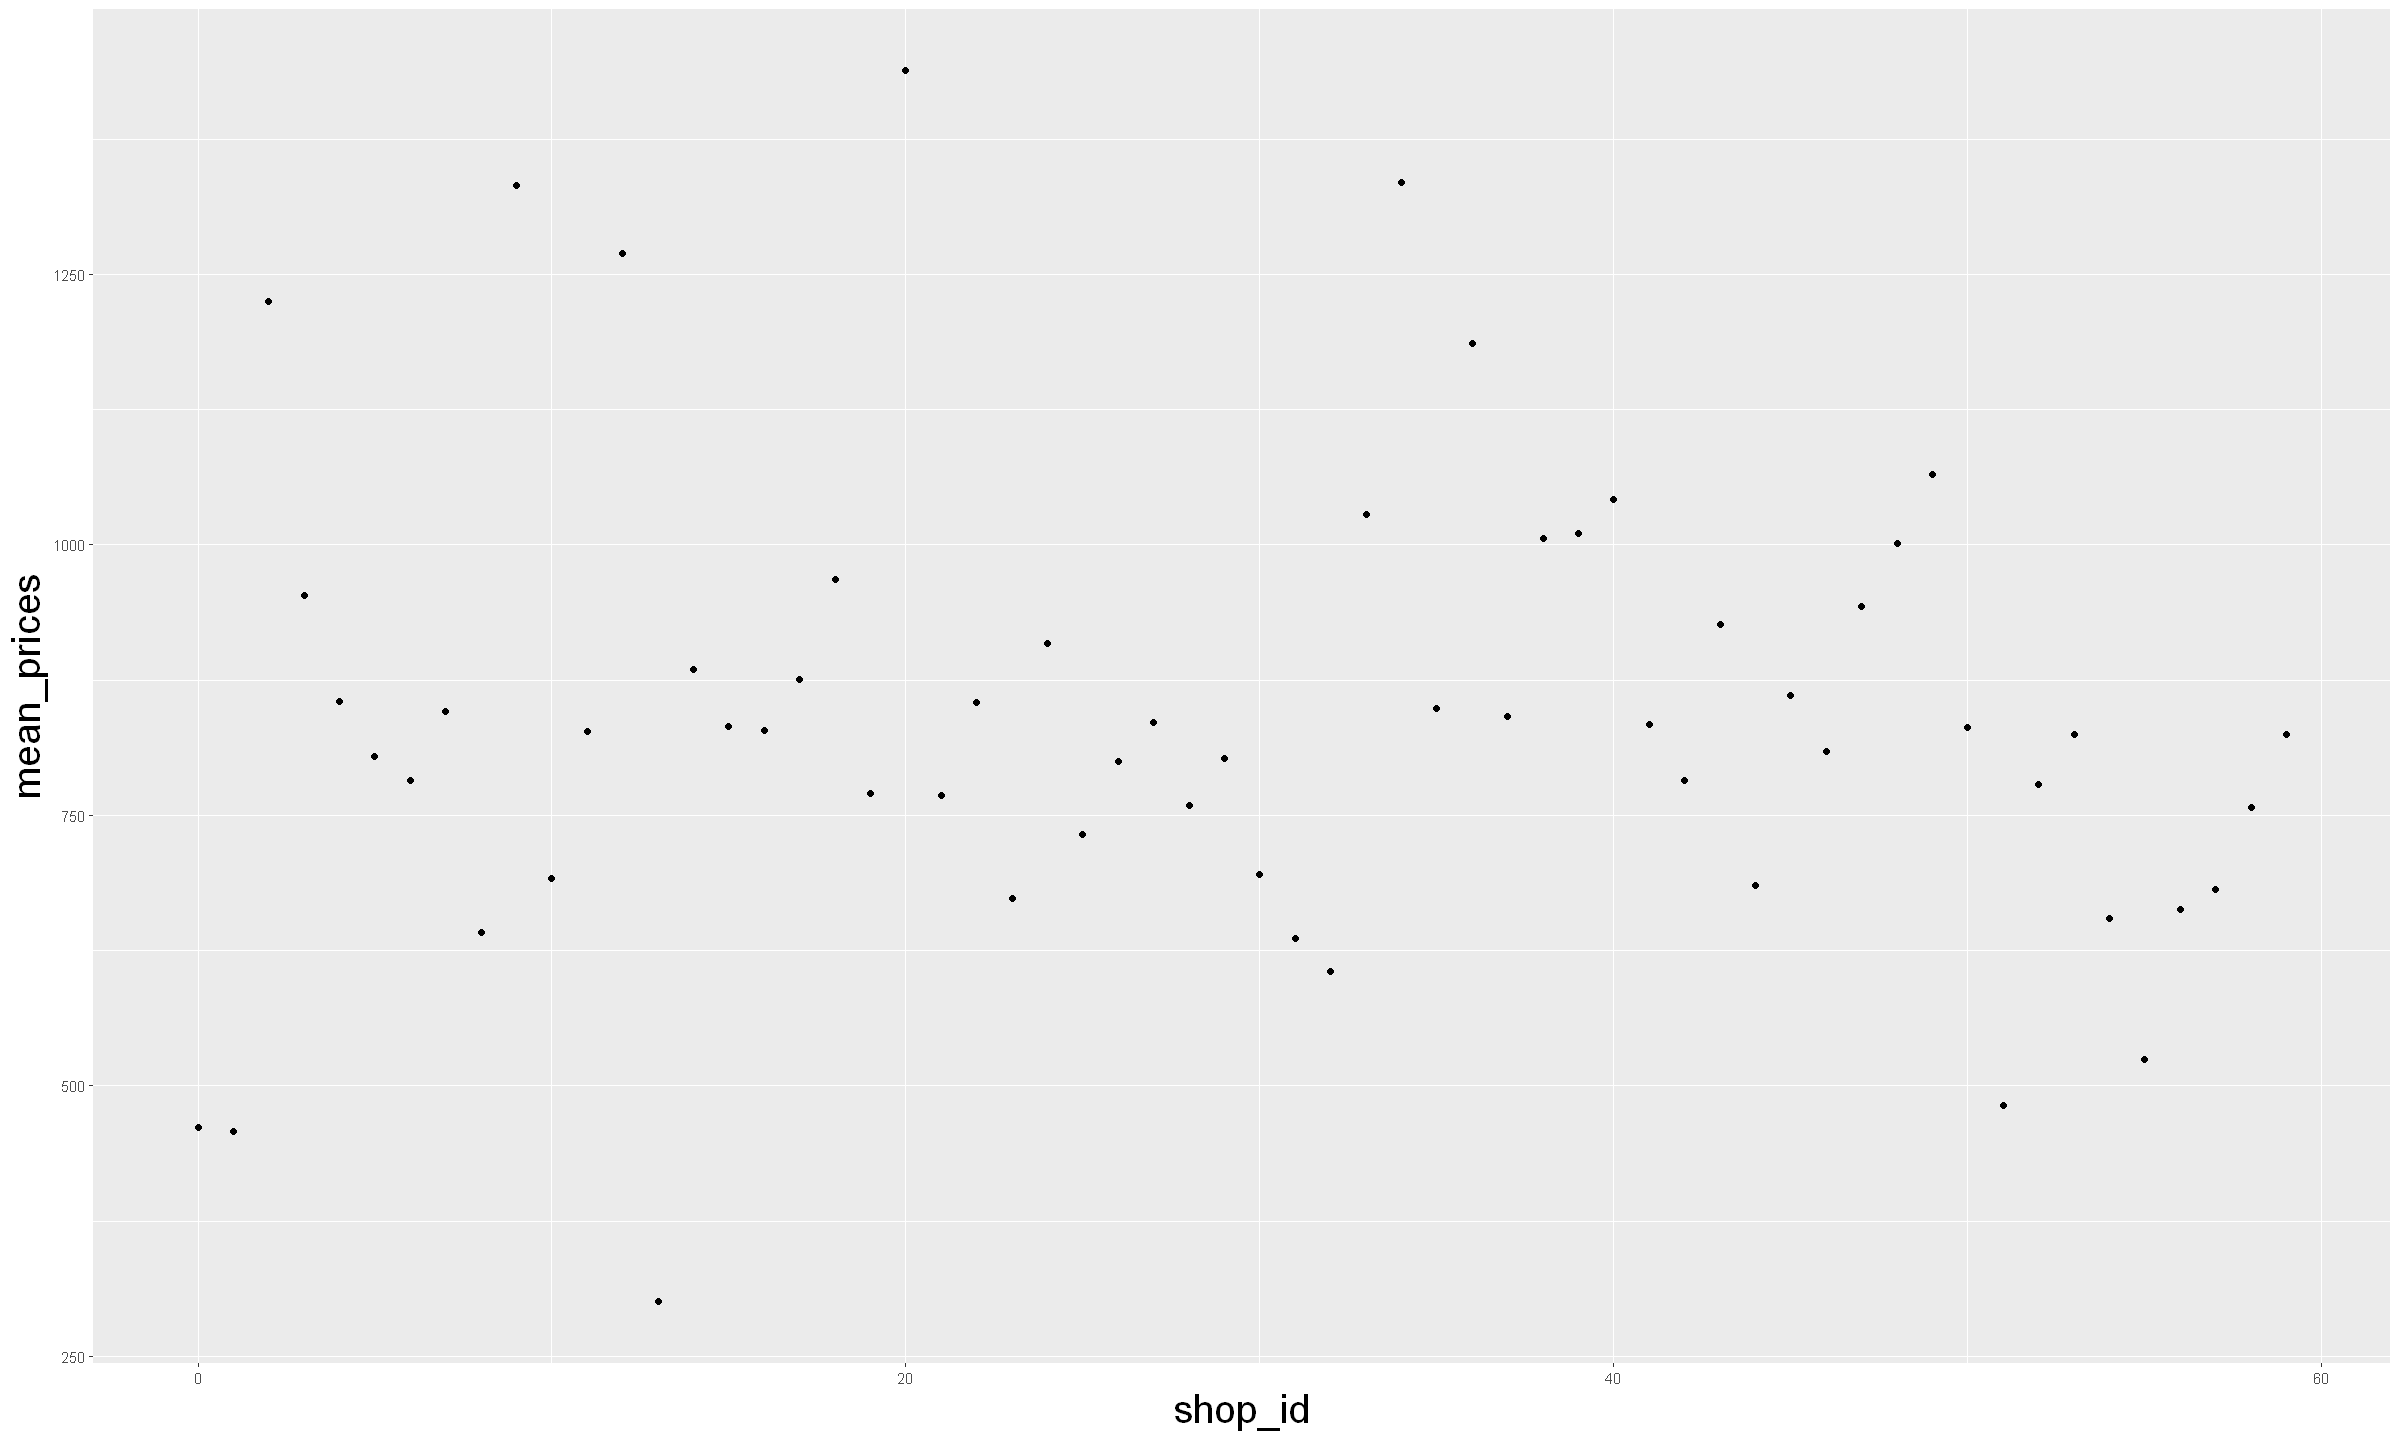

In [28]:
# Calculate mean monthly sales and prices per shop
sales_month_shops <- sales_month %>%
  group_by(shop_id) %>%
  summarise(
    mean_sales = mean(item_cnt_month, na.rm = TRUE),  # Mean monthly sales per shop
    mean_prices = mean(mean_price, na.rm = TRUE)  # Mean monthly prices per shop
  )

# Plot mean monthly prices per shop
ggplot(data = sales_month_shops, aes(x = shop_id, y = mean_prices)) +
  geom_point() +  # Plot points for mean prices
  theme(axis.title.x = element_text(size = 24),  # Increase x-axis label size
        axis.title.y = element_text(size = 24))  # Increase y-axis label size


`summarise()` has grouped output by 'year', 'month', 'date_block_num', 'shop_id'. You can override using the `.groups`
argument.


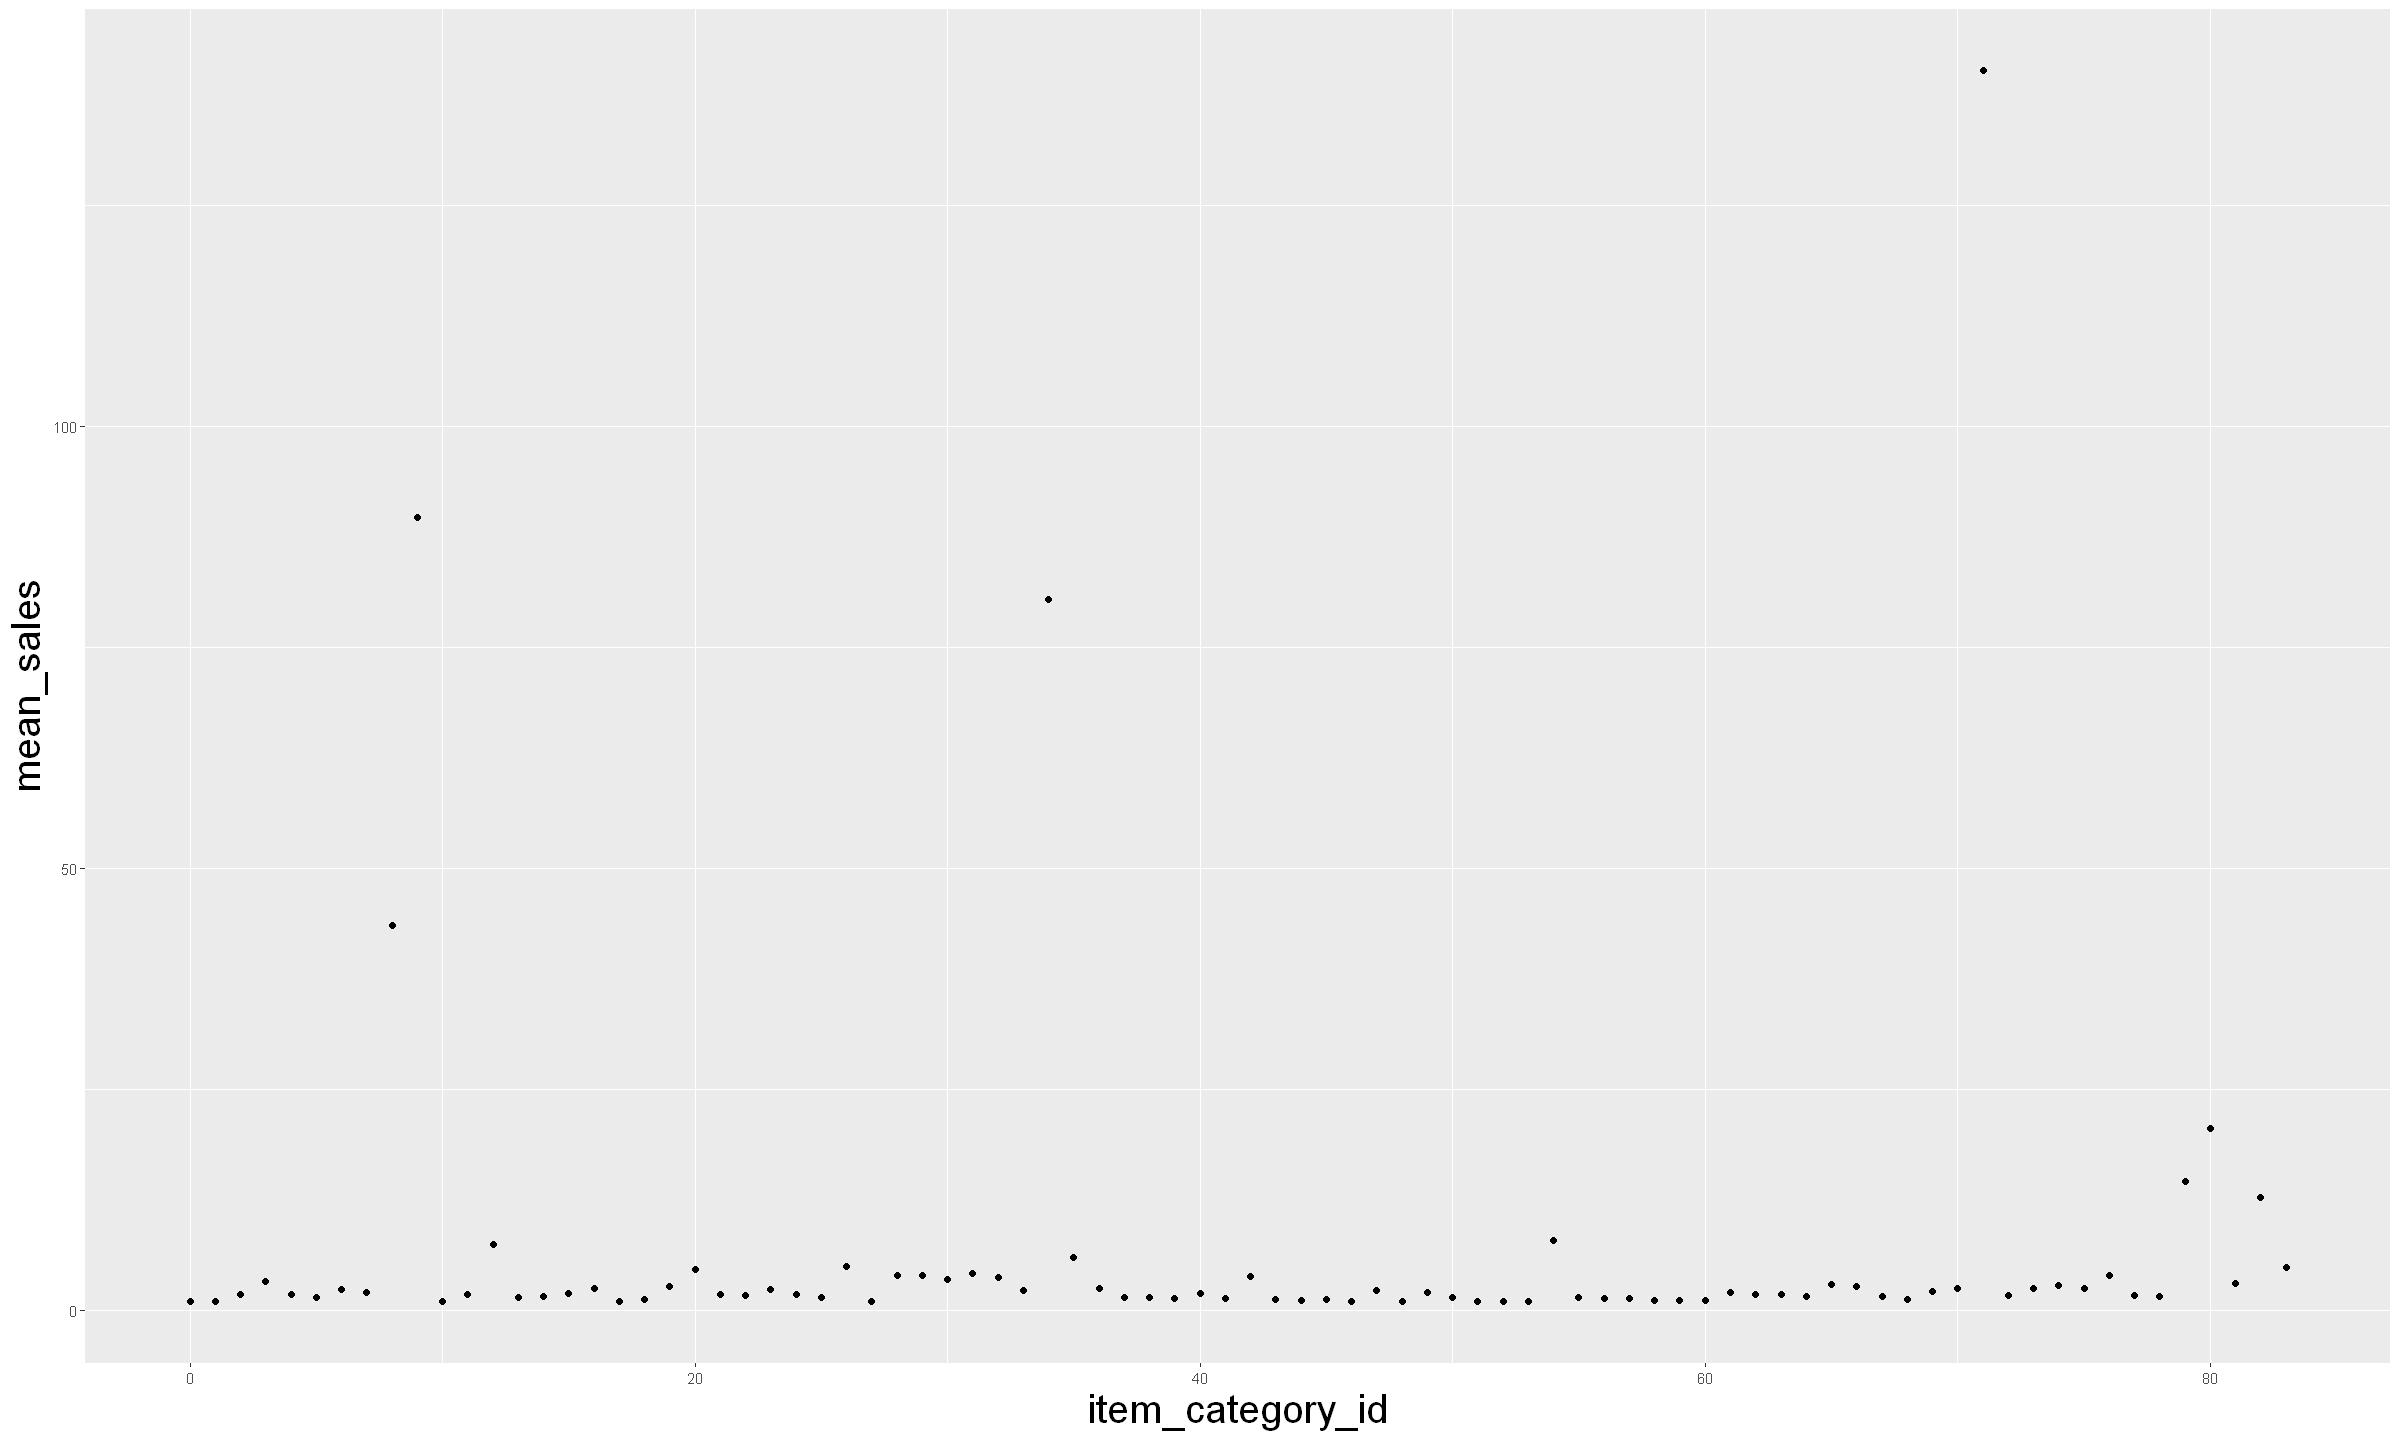

In [29]:
# Rank shops based on mean sales
sales_month_shops <- sales_month_shops %>%
  mutate(ranking_sales_shops = rank(mean_sales))

# Calculate mean monthly sales and prices per item category
sales_month_categories <- sales_month %>%
  group_by(item_category_id) %>%
  summarise(
    mean_sales = mean(item_cnt_month, na.rm = TRUE),  # Mean monthly sales per item category
    mean_prices = mean(mean_price, na.rm = TRUE)  # Mean monthly prices per item category
  )

# Rank item categories based on mean sales
sales_month_categories <- sales_month_categories %>%
  mutate(ranking_sales_cat = rank(mean_sales))

# Calculate monthly sales per item category per shop
sales_month_category <- sales %>%
  group_by(year, month, date_block_num, shop_id, item_category_id) %>%
  summarise(
    item_cnt_month = sum(item_cnt_day, na.rm = TRUE)  # Total items sold in the month per item category per shop
  ) %>%
  ungroup()

# Plot mean monthly sales per item category
ggplot(data = sales_month_categories) +
  geom_point(aes(x = item_category_id, y = mean_sales)) +
  theme(axis.title.x = element_text(size = 24),  # Increase x-axis label size
        axis.title.y = element_text(size = 24))  # Increase y-axis label size


In [30]:
# Merge the 'test' dataframe with the 'items' dataframe based on the 'item_id' column
test <- test %>% left_join(items, by = "item_id") %>% 

# Add new columns 'date_block_num', 'month', and 'year' with fixed values to the 'test' dataframe
                                mutate(
                                  date_block_num = 34,  # Assign value 34 to 'date_block_num'
                                  month = 11,           # Assign value 11 to 'month'
                                  year = 2015           # Assign value 2015 to 'year'
                                )

# Remove unnecessary dataframes from the global environment
rm(item_categories, items, sales_train, shops)


In [31]:
# Group the 'test' dataframe by year, month, date_block_num, shop_id, and item_category_id, 
# then summarise the data (no specific summary function is applied)
test_sales_month <- test %>% 
  group_by(year, month, date_block_num, shop_id, item_category_id) %>% 
  summarise() %>% 
  ungroup()

# Append the 'test_sales_month' dataframe to the 'sales_month_category' dataframe, 
# with missing values (NA) for the 'item_cnt_month' column
sales_month_category <- sales_month_category %>% 
  rbind(
    test_sales_month %>% 
      mutate(item_cnt_month = NA)
  )

# Group the 'sales_month_category' dataframe by date_block_num and item_category_id,
# calculate the mean item sales, pivot the data wider to get mean sales for each month,
# and join with the 'sales_month_categories' dataframe based on 'item_category_id'
item_price_month <- sales_month_category %>% 
  group_by(date_block_num, item_category_id) %>% 
  summarise(mean_sales = mean(item_cnt_month, na.rm = TRUE)) %>% 
  pivot_wider(names_from = date_block_num, values_from = mean_sales) %>% 
  left_join(sales_month_categories, by = "item_category_id") %>% 
  arrange(ranking_sales_cat) %>%  # Arrange the data by 'ranking_sales_cat'
  mutate(
    item_category_id = as.factor(item_category_id),  # Convert 'item_category_id' to factor
    ranking_sales_item = as.factor(ranking_sales_cat)  # Convert 'ranking_sales_cat' to factor
  ) %>% 
  select(-"34")  # Remove the column with label "34" (corresponding to the last month)


`summarise()` has grouped output by 'year', 'month', 'date_block_num', 'shop_id'. You can override using the `.groups`
argument.
`summarise()` has grouped output by 'date_block_num'. You can override using the `.groups` argument.


#### We fill in missing data by employing the knnImpute method, known for its effectiveness in handling missing values. By utilizing this method, our dataset undergoes automatic scaling.

In [32]:
# Perform preprocessing to impute missing values using k-nearest neighbors (knnImpute)
pre <- preProcess(as.data.frame(item_price_month), k = 3, method = c("knnImpute"))
item_price_month <- predict(pre, item_price_month)

# Convert item_category_id and ranking_sales_item to numeric
item_price_month <- item_price_month %>% 
  mutate(
    item_category_id = as.numeric(as.character(item_category_id)),
    ranking_sales_item = as.numeric(as.character(ranking_sales_item))
  )

#### We utilize a for loop to transfer information from previous months to each row. This enables us to incorporate additional data that can be valuable for constructing a suitable model.

In [33]:
# Loop through each row of the sales_month_category dataframe
for (i in 1:nrow(sales_month_category)) {
  # Loop through the last 12 months
  for (j in 1:12) {
    # Add lagged values for each item category
    # Only consider blocks 13 or greater (i.e., 12 months or more of data)
    if (sales_month_category$date_block_num[i] >= 13) {
      
      # Extract lagged values from item_price_month dataframe
      sales_month_category[i, paste0("lag_", j)] <- as.numeric(
        item_price_month[
          item_price_month$item_category_id == sales_month_category$item_category_id[i],
          sales_month_category$date_block_num[i] + 3 - j  # Adjust for lagged months
        ]
      )
    }  
  }
}


In [34]:
# Left join with sales month shops and categories
sales_month_category <- sales_month_category %>% 
  left_join(sales_month_shops[, c("shop_id", "ranking_sales_shops")]) %>% 
  left_join(sales_month_categories[, c("item_category_id", "ranking_sales_cat")])

# Filter out rows where date_block_num is less than or equal to 12
sales_month_category_clean <- sales_month_category %>% 
  filter(!date_block_num <= 12)

# Separate data into train and test sets
train <- sales_month_category_clean %>% 
  filter(date_block_num <= 32)
test <- sales_month_category_clean %>%  
  filter(date_block_num == 33)

# Create a new combined column for shop category
train$shop_category <- paste0(train$shop_id, "_", train$item_category_id)
test$shop_category <- paste0(test$shop_id, "_", test$item_category_id)

# Filter train data to include only those shop categories present in the test data
train <- train %>% filter(shop_category %in% test$shop_category)


Joining with `by = join_by(shop_id)`
Joining with `by = join_by(item_category_id)`


#### Lets apply Random forest

In [35]:
# Set a seed for reproducibility
set.seed(1)

# Fit a random forest model to predict item counts per month
sales_rf <- randomForest(item_cnt_month ~ . , data = train %>% select(-c(shop_id,item_category_id,shop_category)))

# Generate predictions using the trained random forest model
pred <- round(predict(sales_rf, newdata=test))

# Calculate the Root Mean Squared Error (RMSE) to evaluate model performance
RMSE(pred, test$item_cnt_month)


1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
  17    8    8    8    7    8   56   97    8    9   49   18    9   49    8   84 
  17   18   19   20   21   22   23   24   25   26   27   28   29   30   31   32 
   8   15   79   17  109   10   15   17   36   15   93    8   34   31   15   26 
  33   34   35   36   37   38   39   40   41   42   43   44   45   46   47   48 
  11   15   27   27    9   15   13   10   15    7    7    6   42   71    6    8 
  49   50   51   52   53   54   55   56   57   58   59   60   61   62   63   64 
  39   16   38    7   68    6   13   58   15   79    8   13   12   70    7   14 
  65   66   67   68   69   70   71   72   73   74   75   76   77   78   79   80 
  25   12   21    9   12   22   63   21   13   11    8    7   16    7    8    7 
  81   82   83   84   85   86   87   88   89   90   91   92   93   94   95   96 
   8   50   86    7    8   46   18    8   46    8   81    7   14   70   17  113 
  97   98   99  100  101  102  103  104  105  106  107  108  109  110  111  112 
   9   14   36   90    8   33   31   15   28   10   14   29   73   29    8   14 
 113  114  115  116  117  118  119  120  121  122  123  124  125  126  127  128 
  12    7   17    7    7    8   48   86    7    9   43   18    8   47    8   79 
 129  130  131  132  133  134  135  136  137  138  139  140  141  142  143  144 
   7   14   69   17  117    9   15   16   36   90    8   19    7   34   33   14 
 145  146  147  148  149  150  151  152  153  154  155  156  157  158  159  160 
  26   10   14   29   71   27   14   12    8   10   26   11   11   12   10   10 
 161  162  163  164  165  166  167  168  169  170  171  172  173  174  175  176 
  69  132   13   60   28   57   11  118   10   23  103   26  147   14   23   42 
 177  178  179  180  181  182  183  184  185  186  187  188  189  190  191  192 
  21  130   11   23   17   41   11   42   23   38   16   23   37  107   34   11 
 193  194  195  196  197  198  199  200  201  202  203  204  205  206  207  208 
  23   20   12    8   18    8    9    9    9    8    8   64  118    8   10   56 
 209  210  211  212  213  214  215  216  217  218  219  220  221  222  223  224 
  21   10   56    9  105    8   18   94   20  134   11   17   40   17  117    9 
 225  226  227  228  229  230  231  232  233  234  235  236  237  238  239  240 
  20   13   36   38   19   33   13   17   33   99   31    9   17    9   15   10 
 241  242  243  244  245  246  247  248  249  250  251  252  253  254  255  256 
 194  237  211  245  295  129  164  162  377  415  330  150  172  370  369  170 
 257  258  259  260  261  262  263  264  265  266  267  268  269  270  271  272 
  14    7    7    7    6   38   60    7   36   15   36    7   55    6   12   52 
 273  274  275  276  277  278  279  280  281  282  283  284  285  286  287  288 
  14   69    8   13   11   57    7    9   30    6   22   12   19   11   20   55 
 289  290  291  292  293  294  295  296  297  298  299  300  301  302  303  304 
  20    7   12    8   34   52   33   34   35  315 1216   35   34  114  204   36 
 305  306  307  308  309  310  311  312  313  314  315  316  317  318  319  320 
  96   47   38  102   33  123   33  136   51  160   38   56  108   48  117   33 
 321  322  323  324  325  326  327  328  329  330  331  332  333  334  335  336 
  44   46  101   35   69   41   59   42   46   81  283   61   38   55   38   40 
 337  338  339  340  341  342  343  344  345  346  347  348  349  350  351  352 
  18    8    9    9    9    7    8   64  118   10   54   20   55    9  106    8 
 353  354  355  356  357  358  359  360  361  362  363  364  365  366  367  368 
  17   93   19  133   10   16   19   39   16  117    9   20   13   36   18   31 
 369  370  371  372  373  374  375  376  377  378  379  380  381  382  383  384 
  12   16   32   99   30    9   16    9   14   10   10   27   10   11   11   12 
 385  386  387  388  389  390  391  392  393  394  395  396  397  398  399  400 
  10   10   67  126   10   13   58

[1] 54.89792

#### Next, we can apply the Random Forest model to the test dataset to evaluate its performance.

In [36]:
# Split the data into training and test sets
train <- sales_month_category_clean %>% 
  filter(date_block_num <= 33)  # Training data includes months up to 33
test <- sales_month_category_clean %>%  
  filter(date_block_num == 34)  # Test data includes month 34

# Create a new feature combining shop_id and item_category_id
train$shop_category <- paste0(train$shop_id, "_", train$item_category_id)
test$shop_category <- paste0(test$shop_id, "_", test$item_category_id)

# Filter the training data to include only shop_categories present in the test data
train <- train %>% filter(shop_category %in% test$shop_category)

# Fit a random forest model to predict item counts per month
sales_rf <- randomForest(item_cnt_month ~ . , data = train %>% select(-c(shop_id,item_category_id,shop_category)))

# Generate predictions using the trained random forest model
pred <- round(predict(sales_rf, newdata=test))

1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
   9   11   23    9   12   12  503   10   48   11   12   54   84   10   10   47 
  17   18   19   20   21   22   23   24   25   26   27   28   29   30   31   32 
  15   10   28    9   44   21   79  333   11  280   31   15   50   13   79   10 
  33   34   35   36   37   38   39   40   41   42   43   44   45   46   47   48 
  25   12   12    9   22   14  135   72    8   15    9    8   18   10   23   13 
  49   50   51   52   53   54   55   56   57   58   59   60   61   62   63   64 
  26   11   14   24  399   20   13   17   19   80   10   31   59   25    7    9 
  65   66   67   68   69   70   71   72   73   74   75   76   77   78   79   80 
  19    7   11   10  483    8   37    9   10   41   62    8    8   36   12    8 
  81   82   83   84   85   86   87   88   89   90   91   92   93   94   95   96 
  26    8   32   18   58  319    9  255   28   12   39   11   62    8   22    9 
  97   98   99  100  101  102  103  104  105  106  107  108  109  110  111  112 
  10    7   18   12  113   55    7   13    8    7   16    8   19   11   21    9 
 113  114  115  116  117  118  119  120  121  122  123  124  125  126  127  128 
  12   21  372   16   11   14   17   60    8   26   47   24    8   10   23    8 
 129  130  131  132  133  134  135  136  137  138  139  140  141  142  143  144 
  12   11  500    9   43   10   11   50   79    9   10   44   14    9   27    9 
 145  146  147  148  149  150  151  152  153  154  155  156  157  158  159  160 
  41   20   75  330   11  285   30   14   46   13   79    9   24   12   11    8 
 161  162  163  164  165  166  167  168  169  170  171  172  173  174  175  176 
  23   13  139   72    8   17    9    8   18    9   24   13   27   10   14   26 
 177  178  179  180  181  182  183  184  185  186  187  188  189  190  191  192 
 388   20   12   16   18   78    9   31   53   24    8   10   22    8   11   10 
 193  194  195  196  197  198  199  200  201  202  203  204  205  206  207  208 
 521    9   43   10   11   47   76    9    9   42   14    9   29    9   38   19 
 209  210  211  212  213  214  215  216  217  218  219  220  221  222  223  224 
  74  355   10  296   32   13   44   12   79    9   24   11   11    8   23   13 
 225  226  227  228  229  230  231  232  233  234  235  236  237  238  239  240 
 136   71    7   16    9    7   18    9   23   13   27   10   14   25  388   19 
 241  242  243  244  245  246  247  248  249  250  251  252  253  254  255  256 
  12   15   18   77    9   31   54   26   14   15   32   12   18   16  554   14 
 257  258  259  260  261  262  263  264  265  266  267  268  269  270  271  272 
  56   15   17   65  109   14   15   55   20   14   36   14   52   27  104  376 
 273  274  275  276  277  278  279  280  281  282  283  284  285  286  287  288 
  16  333   43   21   63   19  107   14   34   17   16   14   29   20  178   96 
 289  290  291  292  293  294  295  296  297  298  299  300  301  302  303  304 
  13   17   15   12   24   14   28   19   37   16   21   31  428   24   19   23 
 305  306  307  308  309  310  311  312  313  314  315  316  317  318  319  320 
  28  104   14   36   75   33    9   12   26   10   14   13  531   11   51   12 
 321  322  323  324  325  326  327  328  329  330  331  332  333  334  335  336 
  13   60   97   11   12   51   16   11   32   10   49   23   91  348   13  316 
 337  338  339  340  341  342  343  344  345  346  347  348  349  350  351  352 
  36   17   56   15   95   11   28   13   13   10   25   15  161   87    9   16 
 353  354  355  356  357  358  359  360  361  362  363  364  365  366  367  368 
  11    9   20   11   25   14   32   13   17   29  415   22   15   20   22   92 
 369  370  371  372  373  374  375  376  377  378  379  380  381  382  383  384 
  11   33   69   29    7    9   18    7   10    9  474    8   34    9   10   36 
 385  386  387  388  389  390  391  392  393  394  395  396  397  398  399  400 
  52    8    8   33   11    7   25

We need to format the results correctly for output.

In [52]:
# Assign the predicted values 'pred' to the 'item_cnt_month' column in the 'test' dataset
test$item_cnt_month <- pred  

# Display the first few rows of the modified 'test' dataset
head(test)

# Write the 'test' dataset to a CSV file named "submission.csv"
write_csv(test, file = "submission.csv")  


year,month,date_block_num,shop_id,item_category_id,item_cnt_month,lag_1,lag_2,lag_3,lag_4,⋯,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,ranking_sales_shops,ranking_sales_cat,shop_category
<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
2015,11,34,2,0,9,-0.2906597,-0.2578821,-0.2819515,-0.4275324,⋯,-0.3891359,-0.2895706,-0.2612011,-0.3158723,-0.3489649,-0.2161390,-0.3663862,28,5,2_0
2015,11,34,2,2,11,-0.2485139,-0.2766797,-0.3015933,-0.4650936,⋯,-0.4301942,-0.3013288,-0.2717036,-0.3322681,-0.3632957,-0.2204756,-0.3765071,28,43,2_2
2015,11,34,2,3,23,-0.1805084,-0.2104151,-0.2333266,-0.2992458,⋯,-0.3560358,-0.2610235,-0.2352030,-0.2831844,-0.3078662,-0.1853544,-0.2529324,28,64,2_3
2015,11,34,2,5,9,-0.2669799,-0.2805386,-0.3046379,-0.4808124,⋯,-0.4356304,-0.3086911,-0.2760230,-0.3450252,-0.3862373,-0.2259427,-0.3942976,28,27,2_5
2015,11,34,2,6,12,-0.2203228,-0.2686475,-0.2923685,-0.4374830,⋯,-0.3925437,-0.2899521,-0.2658057,-0.3232355,-0.3527912,-0.2093854,-0.3399843,28,53,2_6
2015,11,34,2,7,12,-0.2402257,-0.2705354,-0.2914214,-0.4311072,⋯,-0.4061812,-0.2961745,-0.2677741,-0.3306010,-0.3719391,-0.2110174,-0.3045041,28,47,2_7
